In [1]:
import msprime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdb
from scipy.special import gammaln
import seaborn as sns
import mushi
import pickle
import os
import pickle

In [4]:
plt.rcParams['figure.figsize'] = [24, 16] 
plt.rcParams.update({'font.size': 50})
# plt.plot([1,2,3],[1,2,3])

In [5]:
def simulate_model_SFS(pop_changes,time_points,num_replicates,num_individuals,verbosity=10000):
    # pop_changes, real size
    # time_points, units of generations
    # num_replicates, int
    human_indices = np.arange(0,num_individuals,1)

    SFS_simulated = np.zeros(num_individuals+1)
    for i in range(0,num_replicates):
        if i%verbosity==0:
            print(f'\ton rep={i}')
        demography = msprime.Demography()
        demography.add_population(name="human", initial_size=pop_changes[0])
        for i in range(1,len(pop_changes)):
            demography.add_population_parameters_change(time_points[i], initial_size=pop_changes[i], growth_rate=0, population="human") 
        demography.sort_events()
        # print(demography.debug())
        sim = msprime.sim_ancestry(samples={"human": num_individuals},ploidy=1,demography=demography,model="hudson")
        SFS_simulated+=sim.allele_frequency_spectrum(sample_sets=[human_indices],mode="branch",polarised=True)
    return SFS_simulated

def log_likelihood_poisson(observed,expected_norm):
#     pdb.set_trace()
    # observed is array of counts from data
    # expected_norm is a frequency array (floats) that sums to one; these are the expected proportions under some model
    expected = observed.sum()*expected_norm
#     print(f'expected_norm.sum()={expected_norm.sum()}')
#     print(f'observed.sum()={observed.sum()}')
#     print(f'expected.sum()={expected.sum()}')
    
    zis = observed.shape[0]
    zLL = 0
    for i in range(0,zis):
        z = observed[i]*np.log(expected[i]) - expected[i] - gammaln(observed[i]+1)  
#         print(z)
        zLL+=z
    return zLL


def compute_expected_sfs(sample_size, change_points, sizes): # Thanks to Yun Deng who wrote this function 
    eta = mushi.eta(change_points, sizes)
    L = mushi.utils.C(sample_size) @ mushi.utils.M(sample_size, *eta.arrays())
    esfs = L.sum(1)
    return esfs

def clean_time_column_from_FitCoal(times):
    for c,time in enumerate(times[0:-1]):
        if times[c+1]==times[c]:
            times[c+1]+=1
    return times


In [6]:
colors_for_Arun = {'1e-04':'orange',1e-04:'orange',100:"#1f77b4",1000:'purple'}


## GRCh38

In [7]:
# jobname="LLdiffs_FitCoal_mushi"
# slurmout="/home/tc557/falsifying_bottleneck/slurmout_${jobname}_241205.txt"
# commandline="python /home/tc557/falsifying_bottleneck/calculate_LL_differences_various_FitCoal_mushi_models_241205.py"
# sbatch --wrap="${commandline}" -p icelake -t 02:00:00 -A DURBIN-SL2-CPU --mem=10000 --job-name ${jobname} --output ${slurmout}

filename = f'/home/tc557/LL_differences_various_FitCoal_various_mushi_models_241205b.pickle'
with open(filename,'rb') as f:
    mushi_LL_minus_FitCoal_LL = pickle.load(f)

Succeeded for YRI truncate 1
truncate=1
Succeeded for YRI truncate 10
truncate=10
Succeeded for YRI truncate 20
truncate=20
Succeeded for YRI truncate 21
truncate=21
Succeeded for YRI truncate 26
truncate=26
Succeeded for YRI truncate 30
truncate=30
Succeeded for YRI truncate 40
truncate=40


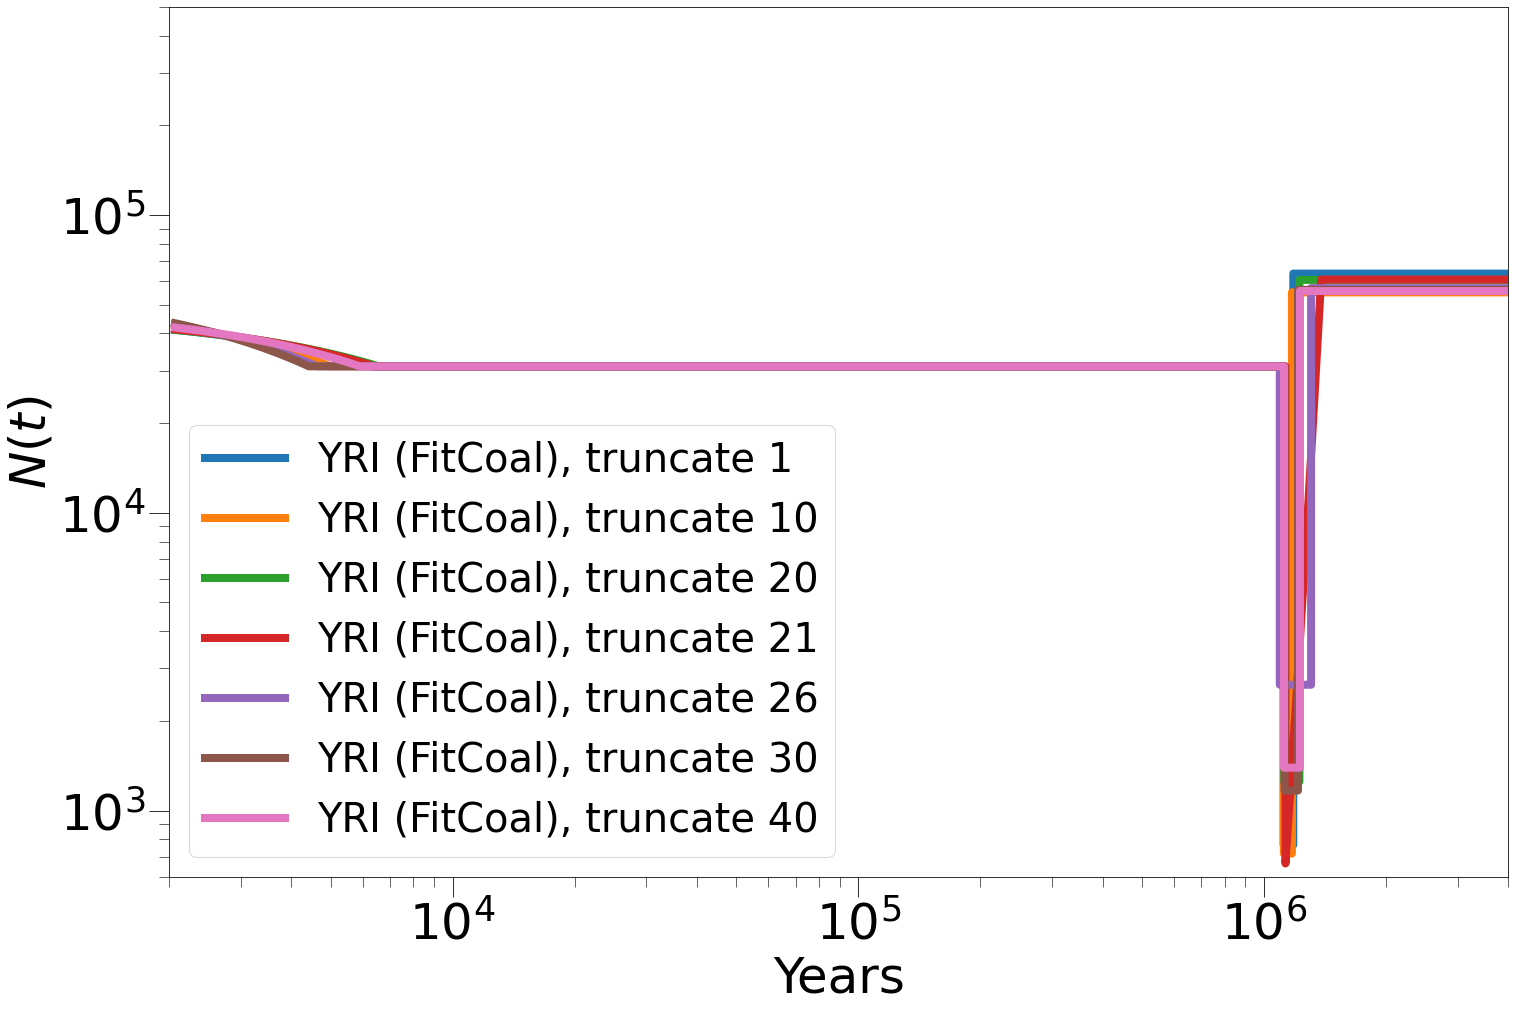

In [10]:
# FitCoal inferences on GRCH38, neutral, unpolarized
zpop = 'YRI'

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here
zpop='YRI'
zlinewidth=8

for truncate in [1,10,20,21,26,30,40]:
    # FitCoal
    inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241011_mydata_nopolar_mappability_Bval0.8/truncate{truncate}_{zpop}.txt'
    inference = np.loadtxt(inferencefile,skiprows=1)
    plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],label=f'{zpop} (FitCoal), truncate {truncate}',linewidth=zlinewidth)
    print(f'Succeeded for {zpop} truncate {truncate}')
    del inference

    print(f'truncate={truncate}')


plt.xlabel('Years')
plt.ylabel('$N(t)$')
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="lower left",ncol=1,fontsize=40)
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
#             plt.title(f'Truncate {truncate}')
plt.ylim(6e+2,5e+05)
plt.xlim(2e+03,4e+06)
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperFigure_SupFig1_FitCoaltruncations.pdf')
plt.show()

trend_1=0; trend_2=1; ridge=1e-04; most_ancient_gens=5e+04; pts=200
	truncate=40
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2131.51 LL FitCoal_p' -3191.09
			(p) 249.47
			(p') 1309.05
	truncate=20
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2144.55 LL FitCoal_p' -3088.95
			(p) 262.51
			(p') 1206.92
	truncate=1
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2245.72 LL FitCoal_p' -2966.22
			(p) 363.68
			(p') 1084.18
trend_1=0; trend_2=1; ridge=100; most_ancient_gens=5e+04; pts=200
	truncate=40
	ridge 100
		LL_mushi - LL_FitCoal
LL mushi -1986.2, LL FitCoal_p -2159.55 LL FitCoal_p' -3191.09
			(p) 173.35
			(p') 1204.89
	truncate=20
	ridge 100
		LL_mushi - LL_FitCoal
LL mushi -1986.2, LL FitCoal_p -2188.03 LL FitCoal_p' -3088.95
			(p) 201.83
			(p') 1102.76
	truncate=1
	ridge 100
		LL_mushi - LL_FitCoal
LL mushi -1986.2, LL FitCoal_p -2319.19 LL FitCoal_p' -2966.22
			(p) 333.0
			(p') 980.02
trend_1=0; tren

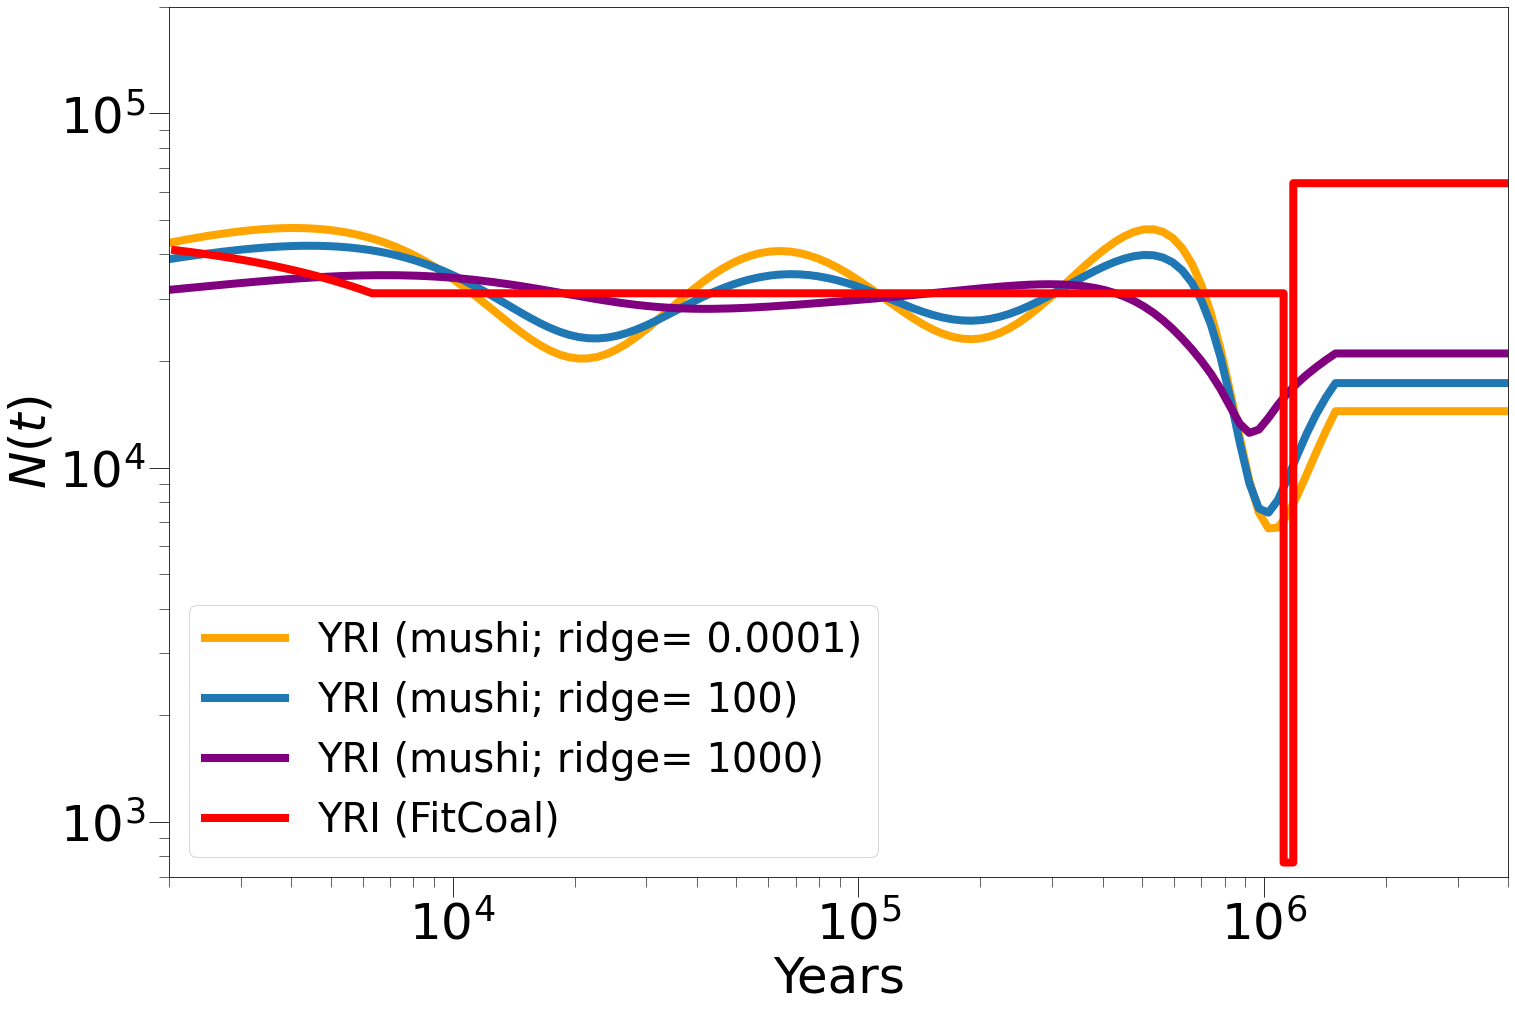

In [22]:
trend_1=0; trend_2=1; ridge=100; most_ancient_gens=5e+04; pts=200

FitCoal_colors_pops = {'MSL':'red','ESN':'red','YRI':'red','CHB':'lightskyblue','JPT':'lightskyblue','BEB':'green','GBR':'gold','TSI':'gold','ITU':'gold'}

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here
zpop='YRI'
zlinewidth=8
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

most_ancient_genss =  ['5e+04']
ptss = [200] 

folded = 'False'

for trend_1 in trend_1s:
    for trend_2 in trend_2s:
        for most_ancient_gens in most_ancient_genss:
            for pts in ptss:
                for ridge in ridges:
                    print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}')
                    for zpop in ['YRI']:




                        try:
                            inferenceparameters_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_241011/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}_{pts}model_parameters.pickle'
                            with open(inferenceparameters_file,'rb') as f:
                                inferenceparameters = pickle.load(f)
                        except:
                            continue
                        mushi_model = inferenceparameters['mushi_model']
                        mushi_model = np.concatenate([mushi_model,np.array([[9e+06,mushi_model[-1,1]]])])   # append final entry   
                        if ridge=='1e-04':
                            ridgelab=0.0001
                        else:
                            ridgelab=ridge
                        plt.plot(gen*mushi_model[:,0]/mushi_gen,mushi_model[:,1],label=f'{zpop} (mushi; ridge= {ridgelab})',linewidth=zlinewidth,color=colors_for_Arun[ridge])
                
                    for truncate in [40,20,1]:
                        print(f'\ttruncate={truncate}')
                        try:

                            
                            stringkey_ = f'truncate={truncate}; trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}'
                            # print(f'\t\tLL diffs = {mushi_LL_minus_FitCoal_LL[stringkey_]}')
                            print(f'\tridge {ridge}\n\t\tLL_mushi - LL_FitCoal')
                            print(f'LL mushi {round(mushi_LL_minus_FitCoal_LL[stringkey_][5],2)}, LL FitCoal_p {round(mushi_LL_minus_FitCoal_LL[stringkey_][3],2)} LL FitCoal_p\' {round(mushi_LL_minus_FitCoal_LL[stringkey_][4],2)}')
                            
                            print(f'\t\t\t(p) {round(mushi_LL_minus_FitCoal_LL[stringkey_][1],2)}')
                            print(f'\t\t\t(p\') {round(mushi_LL_minus_FitCoal_LL[stringkey_][0],2)}')
                        except:
                            continue
                for truncate in [1]:
                    # FitCoal
                    inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241011_mydata_nopolar_mappability_Bval0.8/truncate{truncate}_{zpop}.txt'
                    inference = np.loadtxt(inferencefile,skiprows=1)
                    plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],label=f'{zpop} (FitCoal)',linewidth=zlinewidth,color=FitCoal_colors_pops[zpop])
                    print(f'Succeeded for {zpop} truncate {truncate}')
                    del inference

                    print(f'truncate={truncate}')
                

                plt.xlabel('Years')
                plt.ylabel('$N(t)$')
                plt.xscale('log')
                plt.yscale('log')

                plt.legend(loc="lower left",ncol=1,fontsize=40)
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
        #             plt.title(f'Truncate {truncate}')
                plt.ylim(7e+2,2e+05)
                plt.xlim(2e+03,4e+06)
                plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig2a_mushi_allridges_FitCoaltruncate1.pdf')
                plt.show()



trend_1=0; trend_2=1; ridge=1e-04; most_ancient_gens=5e+04; pts=200
	truncate=40
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2131.51 LL FitCoal_p' -3191.09
			(p) 249.47
			(p') 1309.05
	truncate=20
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2144.55 LL FitCoal_p' -3088.95
			(p) 262.51
			(p') 1206.92
	truncate=1
	ridge 1e-04
		LL_mushi - LL_FitCoal
LL mushi -1882.04, LL FitCoal_p -2245.72 LL FitCoal_p' -2966.22
			(p) 363.68
			(p') 1084.18
Succeeded for YRI truncate 1
truncate=1


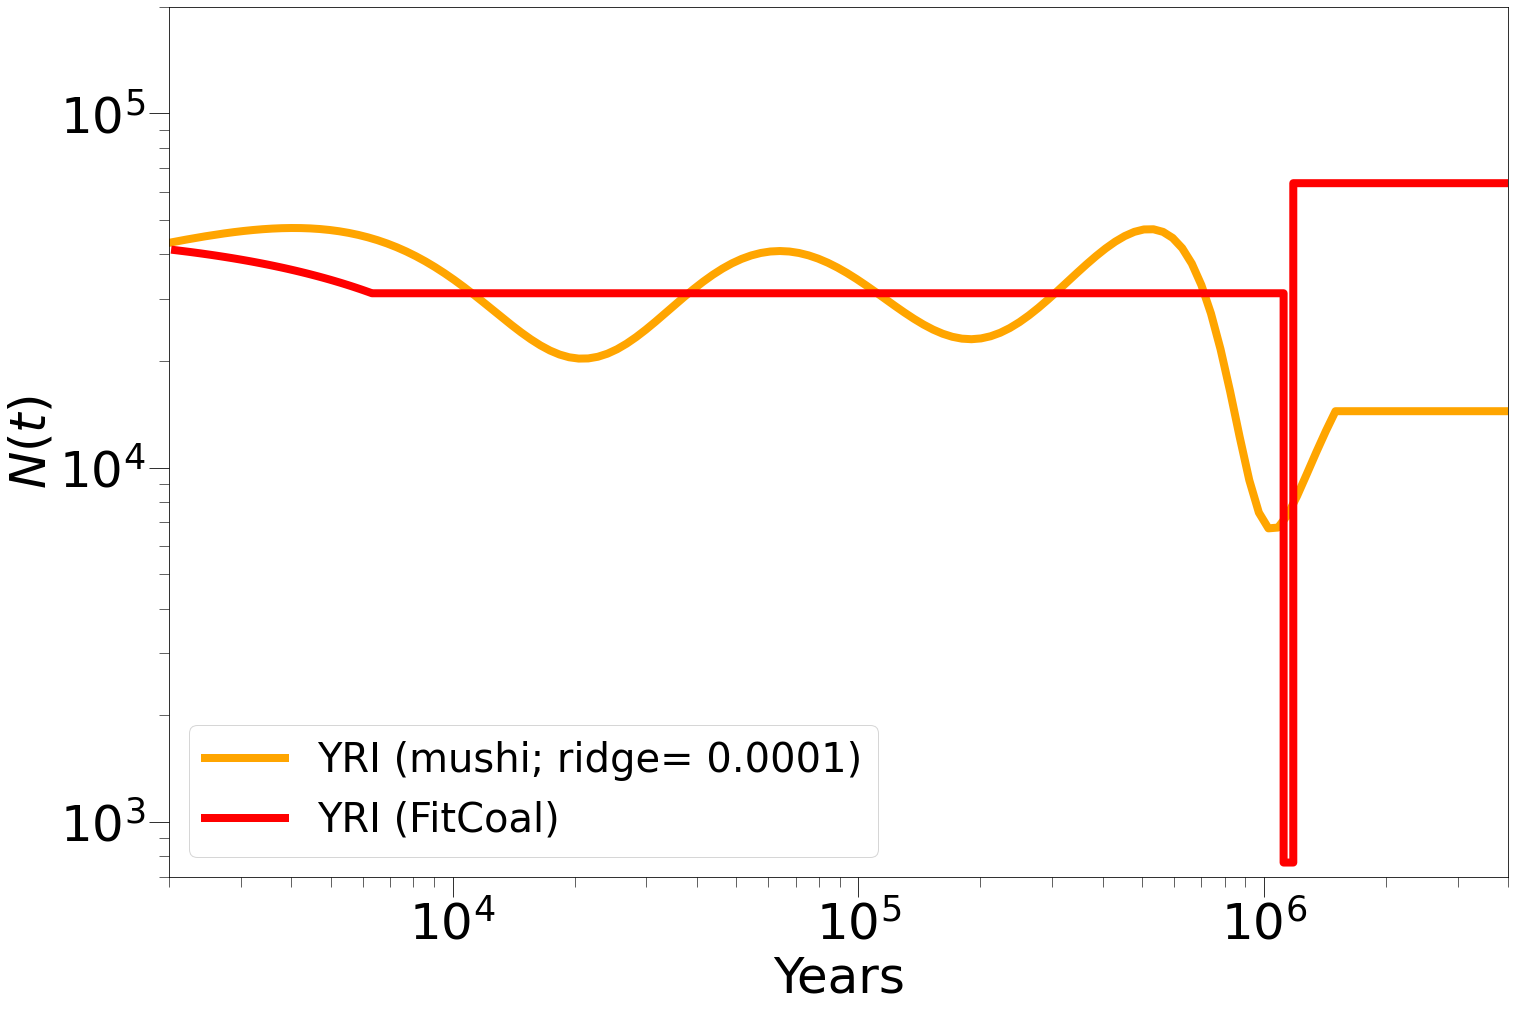

In [16]:
# Figure 1a

trend_1=0; trend_2=1; ridge=100; most_ancient_gens=5e+04; pts=200

# see /home/tc557/falsifying_bottleneck/searching_mushi_model_241204.sh

FitCoal_colors_pops = {'MSL':'red','ESN':'red','YRI':'red','CHB':'lightskyblue','JPT':'lightskyblue','BEB':'green','GBR':'gold','TSI':'gold','ITU':'gold'}

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here
zpop='YRI'
zlinewidth=8
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04'] # ,100,1000]

most_ancient_genss =  ['5e+04']
ptss = [200] 

folded = 'False'

for trend_1 in trend_1s:
    for trend_2 in trend_2s:
        for most_ancient_gens in most_ancient_genss:
            for pts in ptss:
                for ridge in ridges:
                    print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}')
                    for zpop in ['YRI']:




                        # mushi 
    #                     inferenceparameters_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_241011/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}model_parameters.pickle'
                        try:
                            inferenceparameters_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_241011/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}_{pts}model_parameters.pickle'
                            with open(inferenceparameters_file,'rb') as f:
                                inferenceparameters = pickle.load(f)
                        except:
                            continue
                        mushi_model = inferenceparameters['mushi_model']
                        mushi_model = np.concatenate([mushi_model,np.array([[9e+06,mushi_model[-1,1]]])])   # append final entry   
                        
                        plt.plot(gen*mushi_model[:,0]/mushi_gen,mushi_model[:,1],label=f'{zpop} (mushi; ridge= {float(ridge)})',linewidth=zlinewidth,color=colors_for_Arun[ridge])
                
                    for truncate in [40,20,1]:
                        print(f'\ttruncate={truncate}')
                        try:
                            stringkey_ = f'truncate={truncate}; trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}'
                            # print(f'\t\tLL diffs = {mushi_LL_minus_FitCoal_LL[stringkey_]}')
                            print(f'\tridge {ridge}\n\t\tLL_mushi - LL_FitCoal')
                            print(f'LL mushi {round(mushi_LL_minus_FitCoal_LL[stringkey_][5],2)}, LL FitCoal_p {round(mushi_LL_minus_FitCoal_LL[stringkey_][3],2)} LL FitCoal_p\' {round(mushi_LL_minus_FitCoal_LL[stringkey_][4],2)}')
                            
                            print(f'\t\t\t(p) {round(mushi_LL_minus_FitCoal_LL[stringkey_][1],2)}')
                            print(f'\t\t\t(p\') {round(mushi_LL_minus_FitCoal_LL[stringkey_][0],2)}')
                        except:
                            continue
                for truncate in [1]:
                    # FitCoal
                    inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241011_mydata_nopolar_mappability_Bval0.8/truncate{truncate}_{zpop}.txt'
                    inference = np.loadtxt(inferencefile,skiprows=1)
                    plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],label=f'{zpop} (FitCoal)',linewidth=zlinewidth,color=FitCoal_colors_pops[zpop])
                    print(f'Succeeded for {zpop} truncate {truncate}')
                    del inference

                    print(f'truncate={truncate}')
                

                plt.xlabel('Years')
                plt.ylabel('$N(t)$')
                plt.xscale('log')
                plt.yscale('log')

                plt.legend(loc="lower left",ncol=1,fontsize=40)
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
        #             plt.title(f'Truncate {truncate}')
                plt.ylim(7e+2,2e+05)
                plt.xlim(2e+03,4e+06)
                plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperFigure_1_FitCoaltruncate{truncate}_mushi{trend_1}_{trend_2}_{ridge}_YRI.pdf')
                plt.show()



trend_1=0; trend_2=1; ridge=1e-04; truncate=1
	ancestral_state_misidentification_rate = 0.001602873098013696
trend_1=0; trend_2=1; ridge=100; truncate=1
	ancestral_state_misidentification_rate = 0.00187276946740836
trend_1=0; trend_2=1; ridge=1000; truncate=1
	ancestral_state_misidentification_rate = 0.002570218954376807


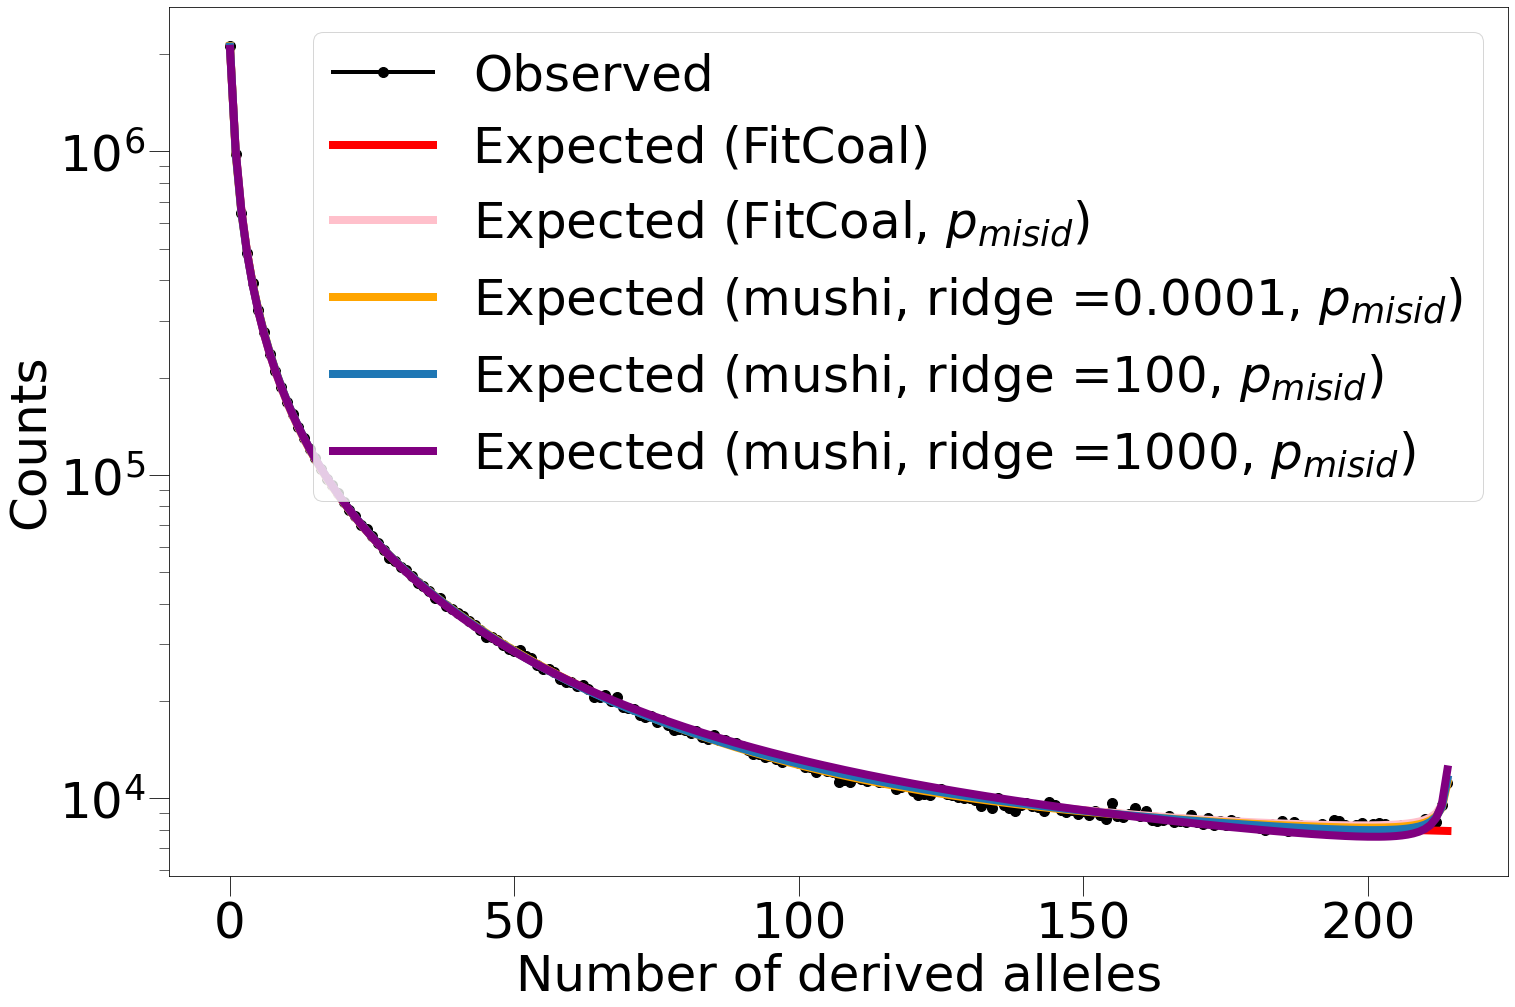

In [81]:
FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

zlinewidth = 8

folded = 'False'
zmarkersize = 0.1
zalpha=1
# for truncate in [1,10,20,21,26,30,40]:
truncate = 1
for trend_1 in trend_1s:
    for trend_2 in trend_2s: 
        
        pmisid_for_FitCoal = 0.001602873098013696 # this comes from trend0,trend1,ridge=0,1,1e-04
        # load observed data SFS and plot it (black)
        pop='YRI'
        observed_SFSfile= f'/home/tc557/rds/rds-durbin-group-8b3VcZwY7rY/projects/human/1000Genomes_30X/phased_vcf/SFS_241003/processed_241011/nopolar_pop{zpop}_allchrs_ndxx.txt.gz'
        observed_sfs = np.loadtxt(observed_SFSfile)
        observed_sfs_one_to_nminusone = observed_sfs[1:-1]
        plt.plot(observed_sfs_one_to_nminusone,label="Observed",linewidth=4,markersize=10,marker='o',color="black")

        # load FitCoal inferred model
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241011_mydata_nopolar_mappability_Bval0.8/truncate{truncate}_{zpop}.txt'
        inference = np.loadtxt(inferencefile,skiprows=1)
        inference[:,0] = gen*inference[:,0]/FitCoal_gen
        pmisid_FitCoal = 0.001602873098013696
        FitCoal_timepoints = clean_time_column_from_FitCoal(inference[0:-1,0])
        expected_SFS_from_FitCoal_calculatedbymushi = compute_expected_sfs(len(observed_sfs)-1, FitCoal_timepoints/gen, inference[:,1]*2) # get the expected SFS from FitCoal's model, using mushi's function
        expected_SFS_from_FitCoal_calculatedbymushi_norm = expected_SFS_from_FitCoal_calculatedbymushi/expected_SFS_from_FitCoal_calculatedbymushi.sum()
        expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid = (1-pmisid_FitCoal)*expected_SFS_from_FitCoal_calculatedbymushi_norm+pmisid_FitCoal*expected_SFS_from_FitCoal_calculatedbymushi_norm[::-1]
        plt.plot(expected_SFS_from_FitCoal_calculatedbymushi_norm*observed_sfs_one_to_nminusone.sum(),label="Expected (FitCoal)",color="red",marker='v',markersize=zmarkersize,linewidth=zlinewidth,linestyle="solid",alpha=zalpha)
        plt.plot(expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid*observed_sfs_one_to_nminusone.sum(),label="Expected (FitCoal, $p_{misid}$)",color="pink",marker='o',markersize=zmarkersize,linewidth=zlinewidth,alpha=zalpha)

        for ridge in ridges:
            print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; truncate={truncate}')


            # load mushi's expected SFS under model
            mushi_model_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_241011/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}model_parameters.pickle'
            with open(mushi_model_file,'rb') as f:
                mushi_model_params = pickle.load(f)
            mushi_p = mushi_model_params['ancestral_state_misidentification_rate']
            ancestral_state_misidentification_rate = mushi_p
            print(f'\tancestral_state_misidentification_rate = {ancestral_state_misidentification_rate}')
            _observed_data = mushi_model_params['observed_SFS']
            mushi_expected_SFS = mushi_model_params['expected_sfs']
            mushi_expected_SFS_norm = mushi_expected_SFS/mushi_expected_SFS.sum()



            # plt.xscale('log')
            # plt.plot(_observed_data,label="Observed (check)",linewidth=4,linestyle="dashed")
            if ridge == '1e-04':
                ridgelab = 0.0001
            else:
                ridgelab = ridge
            plt.plot(mushi_expected_SFS,label="Expected (mushi, ridge =" + str(ridgelab) + ", $p_{misid}$)",color=colors_for_Arun[ridge],linewidth=zlinewidth,markersize=zmarkersize,marker='o',alpha=zalpha)
plt.legend()
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Number of derived alleles')
plt.ylabel('Counts')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_2b_FitCoaltruncate{truncate}_mushiallridges_YRI_SFS_expected_observed.pdf')
plt.show()
            


trend_1=0; trend_2=1; ridge=1e-04; truncate=1
	inferred p from mushi = 0.001602873098013696
	FitCoal LL (without p_misid) -2966.219531053044
	FitCoal LL (with p_misid) -2232.8239836982902
	mushi LL (with p_misid) = -1811.7909641346123
	LL(mushi) - LL(FitCoal) (with p_misid in FitCoal) = 421.03301956367795
	LL(mushi) - LL(FitCoal) (without p_misid)= 1154.428566918432



trend_1=0; trend_2=1; ridge=100; truncate=1
	inferred p from mushi = 0.00187276946740836
	FitCoal LL (without p_misid) -2966.219531053044
	FitCoal LL (with p_misid) -2232.8239836982902
	mushi LL (with p_misid) = -1985.81667337221
	LL(mushi) - LL(FitCoal) (with p_misid in FitCoal) = 247.0073103260802
	LL(mushi) - LL(FitCoal) (without p_misid)= 980.4028576808341



trend_1=0; trend_2=1; ridge=1000; truncate=1
	inferred p from mushi = 0.002570218954376807
	FitCoal LL (without p_misid) -2966.219531053044
	FitCoal LL (with p_misid) -2232.8239836982902
	mushi LL (with p_misid) = -3613.3163946153654
	LL(mushi) - LL(FitCoal) (wi

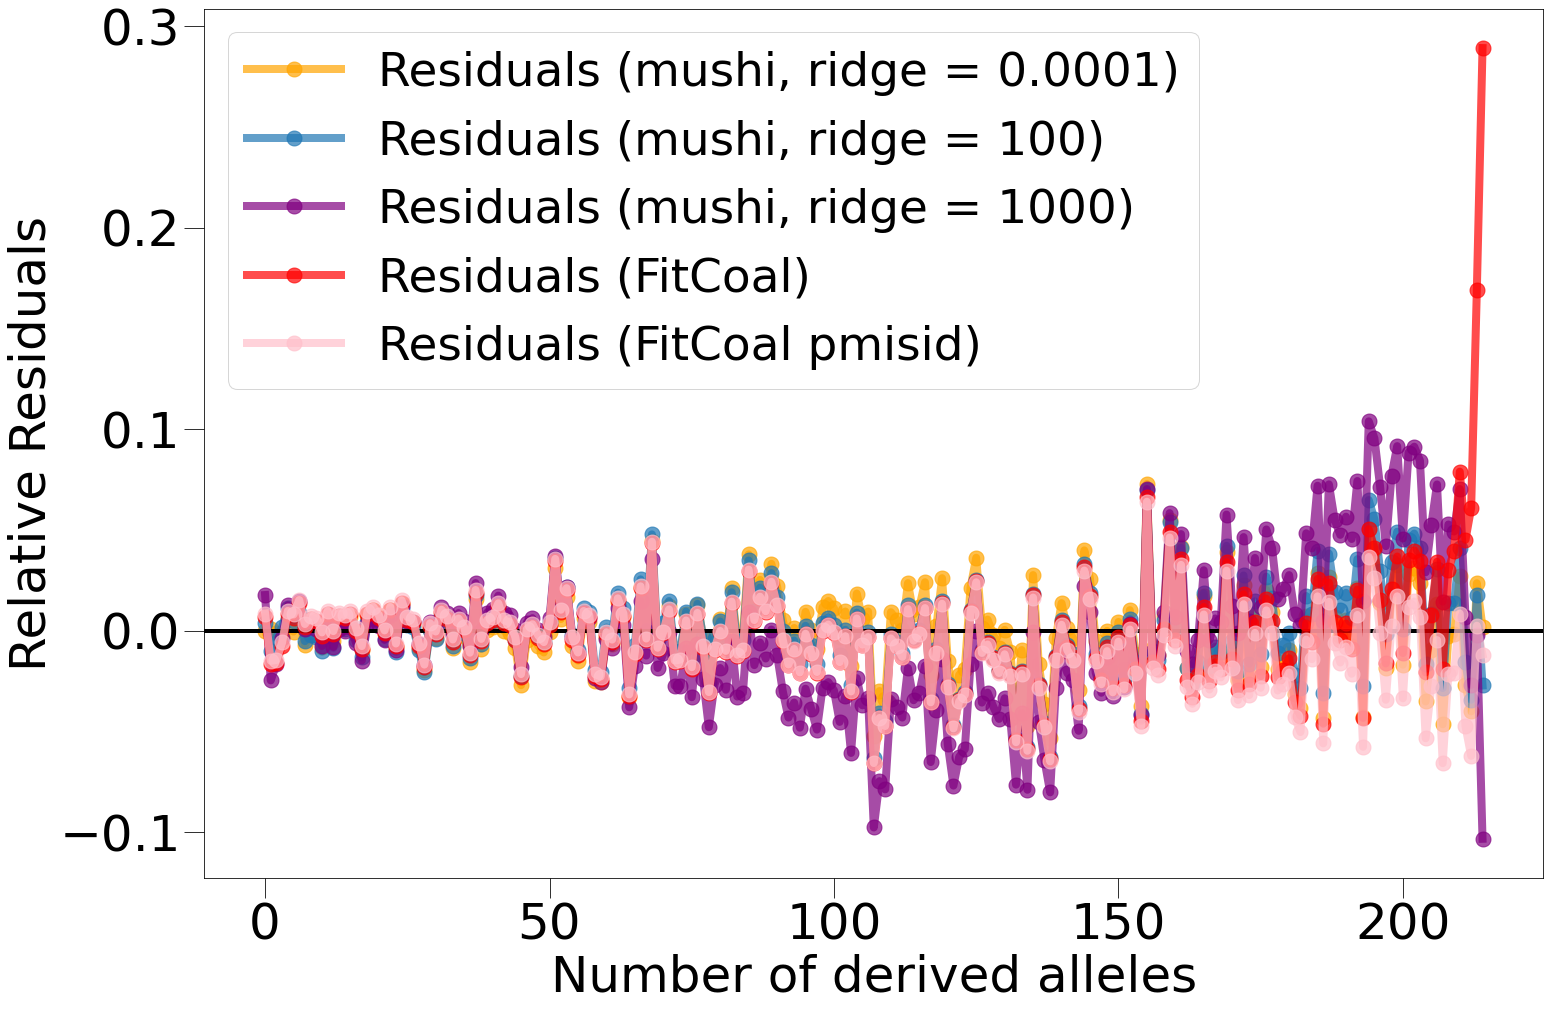

In [77]:
FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

zlinewidth = 8

folded = 'False'
zmarkersize = 0.1
zalpha=1
# for truncate in [1,10,20,21,26,30,40]:
truncate = 1
relative_resids  = True
for trend_1 in trend_1s:
    for trend_2 in trend_2s: 
        
        # load observed data SFS and plot it (black)
        pop='YRI'
        observed_SFSfile= f'/home/tc557/rds/rds-durbin-group-8b3VcZwY7rY/projects/human/1000Genomes_30X/phased_vcf/SFS_241003/processed_241011/nopolar_pop{zpop}_allchrs_ndxx.txt.gz'
        observed_sfs = np.loadtxt(observed_SFSfile)
        observed_sfs_one_to_nminusone = observed_sfs[1:-1]
        
        # load FitCoal inferred model
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241011_mydata_nopolar_mappability_Bval0.8/truncate{truncate}_{zpop}.txt'
        inference = np.loadtxt(inferencefile,skiprows=1)
        inference[:,0] = gen*inference[:,0]/FitCoal_gen
        FitCoal_timepoints = clean_time_column_from_FitCoal(inference[0:-1,0])
        pmisid_FitCoal = 0.001602873098013696

        expected_SFS_from_FitCoal_calculatedbymushi = compute_expected_sfs(len(observed_sfs)-1, FitCoal_timepoints/gen, inference[:,1]*2) # get the expected SFS from FitCoal's model, using mushi's function
        expected_SFS_from_FitCoal_calculatedbymushi_norm = expected_SFS_from_FitCoal_calculatedbymushi/expected_SFS_from_FitCoal_calculatedbymushi.sum()
        expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid = (1-pmisid_FitCoal)*expected_SFS_from_FitCoal_calculatedbymushi_norm+pmisid_FitCoal*expected_SFS_from_FitCoal_calculatedbymushi_norm[::-1]

        for ridge in ridges:
            print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; truncate={truncate}')

#             plt.plot(observed_sfs_one_to_nminusone,label="Observed",linewidth=4,markersize=10,marker='o',color="black")

            # load mushi's expected SFS under model
            mushi_model_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_241011/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}model_parameters.pickle'
            with open(mushi_model_file,'rb') as f:
                mushi_model_params = pickle.load(f)
            mushi_p = mushi_model_params['ancestral_state_misidentification_rate']
            ancestral_state_misidentification_rate = mushi_p
            _observed_data = mushi_model_params['observed_SFS']
            mushi_expected_SFS = mushi_model_params['expected_sfs']
            mushi_expected_SFS_norm = mushi_expected_SFS/mushi_expected_SFS.sum()

            print(f'\tinferred p from mushi = {ancestral_state_misidentification_rate}')
            LL_FitCoal_without = log_likelihood_poisson(observed_sfs_one_to_nminusone,expected_SFS_from_FitCoal_calculatedbymushi_norm)
            print(f'\tFitCoal LL (without p_misid) {LL_FitCoal_without}')

            LL_FitCoal_with = log_likelihood_poisson(observed_sfs_one_to_nminusone,expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid)
            print(f'\tFitCoal LL (with p_misid) {LL_FitCoal_with}')                

            LL_mushi = log_likelihood_poisson(observed_sfs_one_to_nminusone,mushi_expected_SFS_norm)
            print(f'\tmushi LL (with p_misid) = {LL_mushi}')

            LL_diffs_pmisid = LL_mushi-LL_FitCoal_with
            print(f'\tLL(mushi) - LL(FitCoal) (with p_misid in FitCoal) = {LL_diffs_pmisid}')

            LL_diffs = LL_mushi-LL_FitCoal_without
            print(f'\tLL(mushi) - LL(FitCoal) (without p_misid)= {LL_diffs}')

            print(f'\n\n')
#             plt.show()

            observed_sfs_one_to_nminusone_norm = observed_sfs_one_to_nminusone/observed_sfs_one_to_nminusone.sum()
            residuals_FitCoal = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm
            residuals_FitCoal_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm)/observed_sfs_one_to_nminusone_norm           
            residuals_FitCoal_pmisid = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid            
            residuals_FitCoal_pmisid_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid)/observed_sfs_one_to_nminusone_norm            
            residuals_mushi = observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm
            residuals_mushi_relative = (observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm)/observed_sfs_one_to_nminusone_norm
            if ridge=='1e-04':
                ridgelab = 0.0001
            else:
                ridgelab = ridge
            if relative_resids == False:
                
                if ridge == '1e-04':                    
                    plt.plot(residuals_FitCoal,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red")
                    plt.plot(residuals_FitCoal_pmisid,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="purple",linestyle="solid")
                plt.plot(residuals_mushi,label=f"Residuals (mushi, ridge = {ridgelab})",linewidth=zlinewidth)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Residual (observed-expected)')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                plt.legend()
            else:
                plt.plot(residuals_mushi_relative,label=f"Residuals (mushi, ridge = {ridgelab})",color=colors_for_Arun[ridge],linewidth=zlinewidth,alpha=0.7,marker='o',markersize=15)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Relative Residuals')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                if ridge == 1000:
                    plt.plot(residuals_FitCoal_relative,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red",alpha=0.7,marker='o',markersize=15)
                    plt.plot(residuals_FitCoal_pmisid_relative,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="pink",linestyle="solid",alpha=0.7,marker='o',markersize=15)

plt.legend(fontsize=47)
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_2c_FitCoaltruncate{truncate}_mushiallridges_YRI_SFS_expected_observed_residuals.pdf')

plt.show()
            
            


## GRCh37, noncoding, polarized

In [43]:
# python /home/tc557/falsifying_bottleneck/calculate_LL_differences_various_FitCoal_mushi_models_hg19_noncoding_241205.py

LLdiffs_file = '/home/tc557/rds/hpc-work/mushi_1KGP_inference_hg19_241129/LL_differences_various_FitCoal_various_mushi_models_hg19_noncoding_241218.pickle'
with open(LLdiffs_file,'rb') as f:
    mushi_LL_minus_FitCoal_LL = pickle.load(f)
    

/tmp/ipykernel_1913670/4138766634.py:7: UserWarning: loadtxt: Empty input file: "/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_polar_noncoding/truncate1_YRI.txt"
  inference = np.loadtxt(inferencefile,skiprows=1)


Succeeded for YRI truncate 10
truncate=10
Succeeded for YRI truncate 20
truncate=20
Succeeded for YRI truncate 21
truncate=21
Succeeded for YRI truncate 26
truncate=26
Succeeded for YRI truncate 30
truncate=30
Succeeded for YRI truncate 40
truncate=40


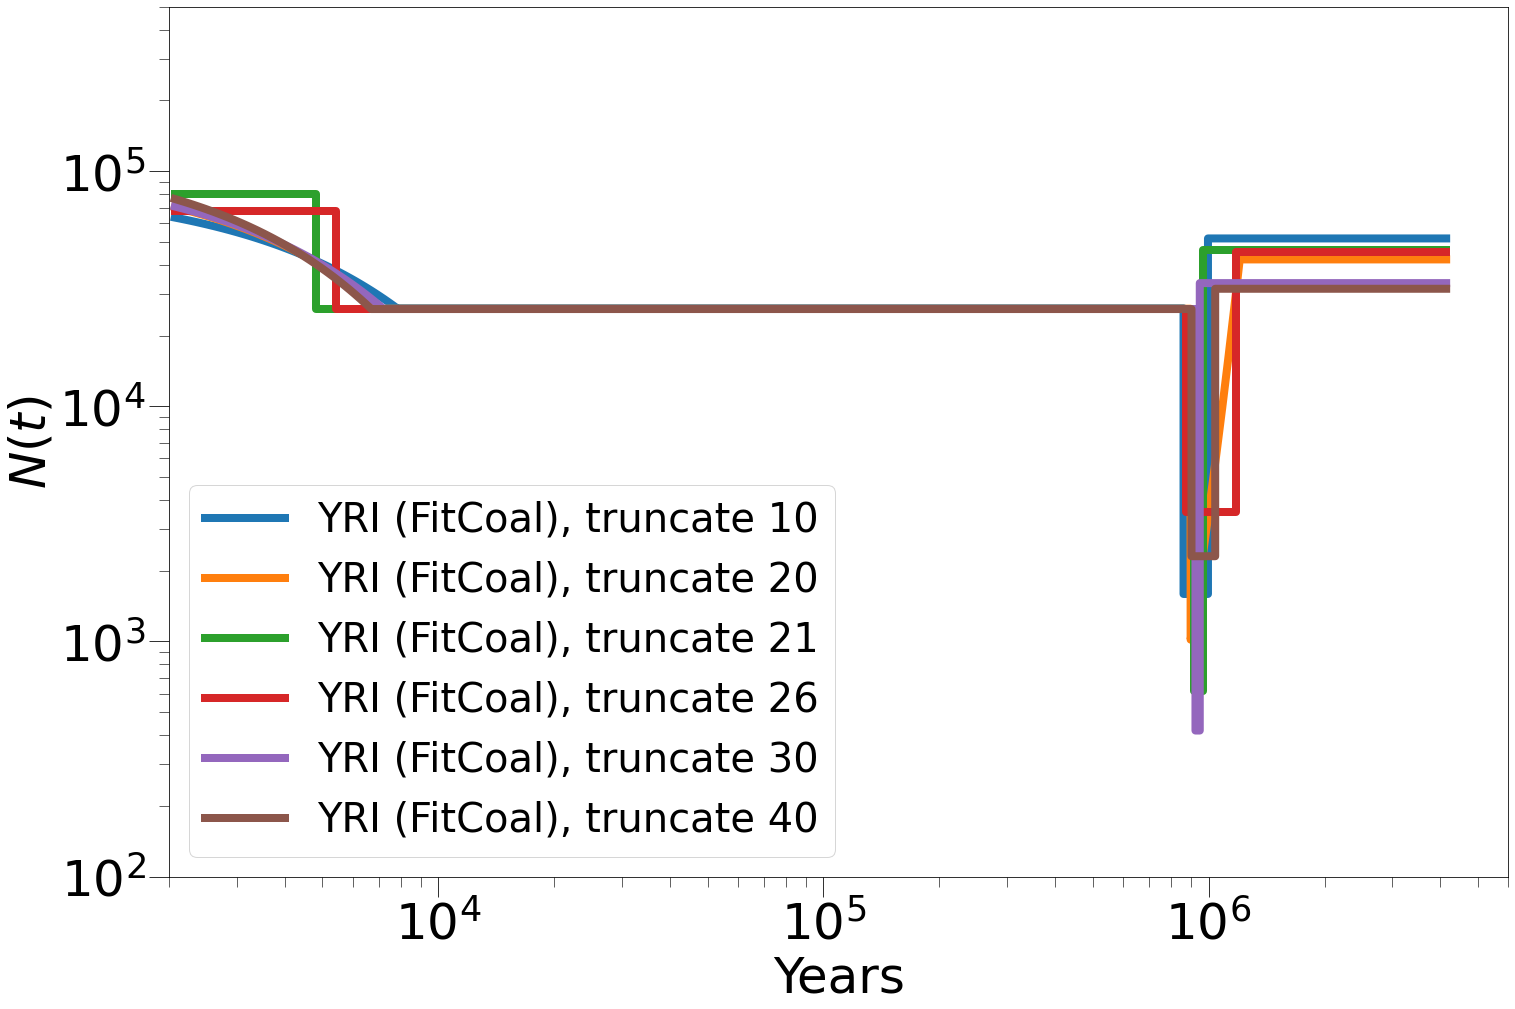

In [44]:
# FitCoal inferences on YRI; hg20, Bvalue

for truncate in [1,10,20,21,26,30,40]:
    # FitCoal
    inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_polar_noncoding/truncate{truncate}_{zpop}.txt'
    try:
        inference = np.loadtxt(inferencefile,skiprows=1)
        plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],label=f'{zpop} (FitCoal), truncate {truncate}',linewidth=zlinewidth)
    except:
        continue
    print(f'Succeeded for {zpop} truncate {truncate}')
    del inference

    print(f'truncate={truncate}')


plt.xlabel('Years')
plt.ylabel('$N(t)$')
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="lower left",ncol=1,fontsize=40)
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
#             plt.title(f'Truncate {truncate}')
plt.ylim(1e+2,5e+05)
plt.xlim(2e+03,6e+06)
#         plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241008/paperFigure_FitCoaltruncate{truncate}_mushi{trend_1}_{trend_2}_{ridge}_YRI_241014_1900.pdf')
plt.show()

trend_1=0 ; trend_2=1; ridge=1e-04; mag=5e+04
	ancestral_state_misidentification_rate = 0.019536885330969797
	truncate=1
		LL mushi -1990.61, LL FitCoal_p -2791.6 LL FitCoal_p' -3261.26
			(p) 800.99
			(p') 1270.65
	truncate=10
		LL mushi -1990.61, LL FitCoal_p -1964.61 LL FitCoal_p' -3095.07
			(p) -25.99
			(p') 1104.46
	truncate=20
		LL mushi -1990.61, LL FitCoal_p -2298.33 LL FitCoal_p' -3559.53
			(p) 307.72
			(p') 1568.92
	truncate=21
		LL mushi -1990.61, LL FitCoal_p -2217.69 LL FitCoal_p' -3197.77
			(p) 227.08
			(p') 1207.16
	truncate=26
		LL mushi -1990.61, LL FitCoal_p -2671.56 LL FitCoal_p' -3199.78
			(p) 680.95
			(p') 1209.17
	truncate=30
	truncate=40
trend_1=0 ; trend_2=1; ridge=100; mag=5e+04
	ancestral_state_misidentification_rate = 0.02001590795316934
	truncate=1
		LL mushi -2347.65, LL FitCoal_p -2883.25 LL FitCoal_p' -3261.26
			(p) 535.6
			(p') 913.61
	truncate=10
		LL mushi -2347.65, LL FitCoal_p -1951.41 LL FitCoal_p' -3095.07
			(p) -396.24
			(p') 747.42
	

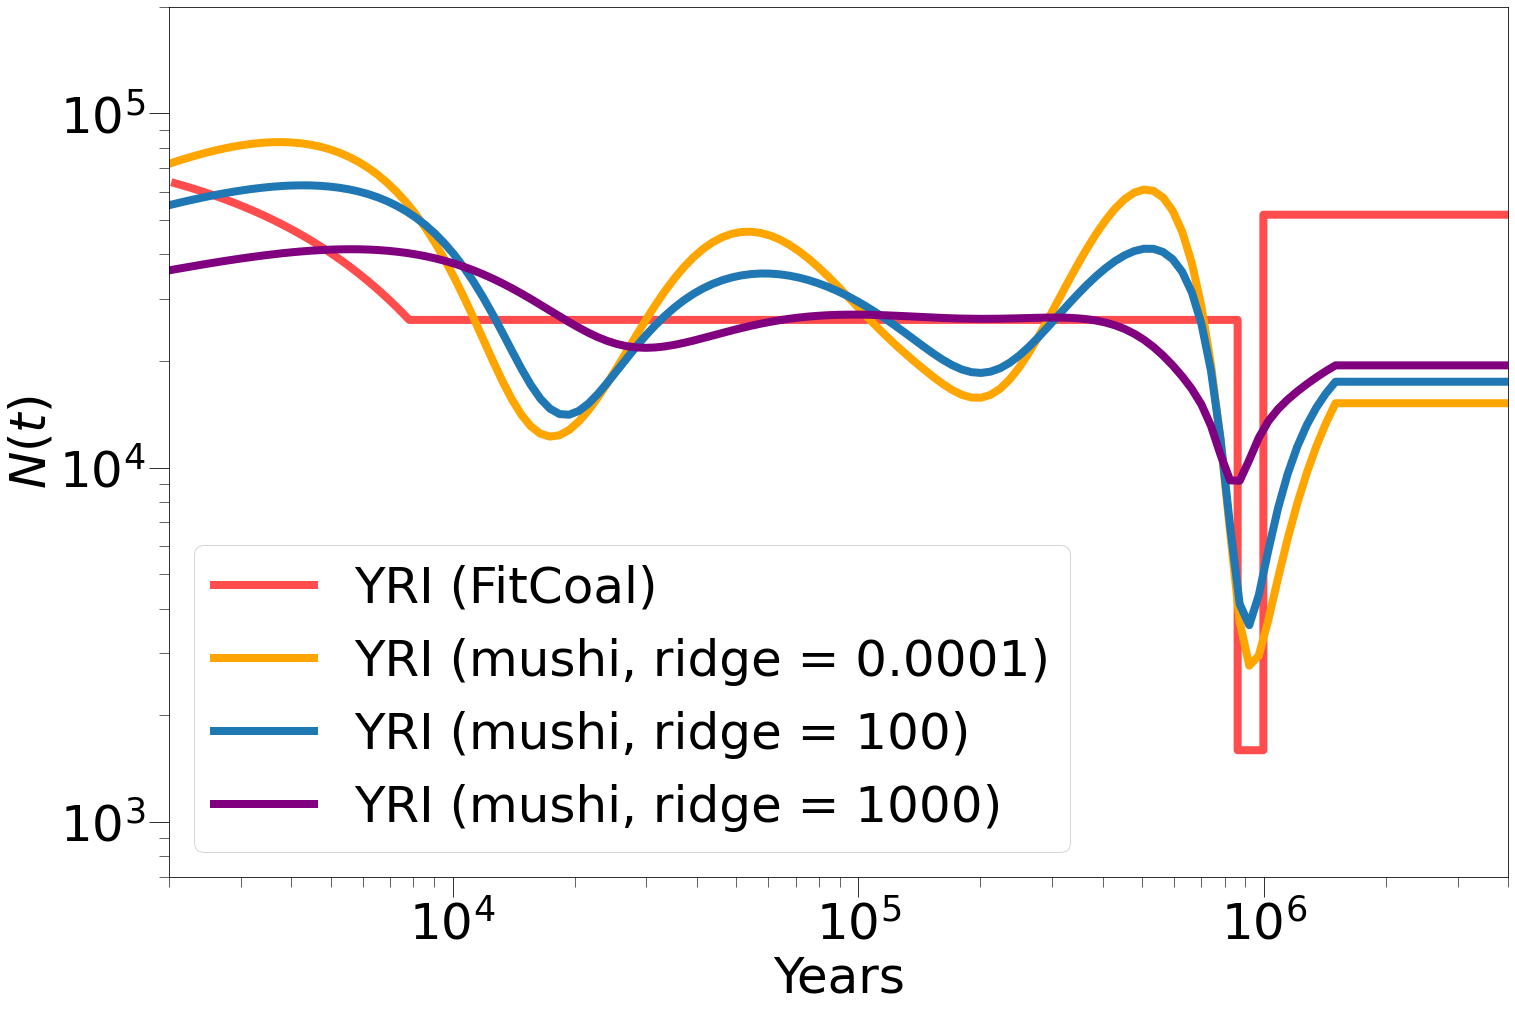

In [72]:
# proposed Sup Fig 5a

# noncoding data with polarisation
# plot all mushi inference
FitCoal_colors_pops = {'MSL':'red','ESN':'red','YRI':'red','CHB':'lightskyblue','JPT':'lightskyblue','BEB':'green','GBR':'gold','TSI':'gold','ITU':'gold'}

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

zlinewidth=8
# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

folded = 'False'
zpop = 'YRI'
most_ancient_genss = ['5e+04']
ztruncate = 1

for trend_1 in trend_1s:
    for trend_2 in trend_2s:
        ztruncate = 10
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_polar_noncoding/truncate{ztruncate}_{zpop}.txt'
        inference = np.loadtxt(inferencefile,skiprows=1)
        if len(inference)==0:
            continue
        plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],color=FitCoal_colors_pops[zpop],label=f'{zpop} (FitCoal)',linewidth=zlinewidth,alpha=0.7)


        for ridge in ridges:
            # FitCoal


            for most_ancient_gens in most_ancient_genss:
                print(f'trend_1={trend_1} ; trend_2={trend_2}; ridge={ridge}; mag={most_ancient_gens}')
                # mushi 
                inferenceparameters_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_hg19_241129/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}model_parameters.pickle'
                try:
                    with open(inferenceparameters_file,'rb') as f:
                        inferenceparameters = pickle.load(f)
                except:
                    continue
                mushi_model = inferenceparameters['mushi_model']
                mushi_model = np.concatenate([mushi_model,np.array([[9e+06,mushi_model[-1,1]]])])   # append final entry   
                
                zancestral_state_misidentification_rate = inferenceparameters["ancestral_state_misidentification_rate"]
                print(f'\tancestral_state_misidentification_rate = {zancestral_state_misidentification_rate}')
                
                if ridge == '1e-04':
                    ridgelab = 0.0001
                else:
                    ridgelab = ridge
                plt.plot(gen*mushi_model[:,0]/mushi_gen,mushi_model[:,1],label=f'{zpop} (mushi, ridge = {ridgelab})',color=colors_for_Arun[ridge],linewidth=zlinewidth,alpha=1)

##
                for truncate in [1,10,20,21,26,30,40]:
                    print(f'\ttruncate={truncate}')
                    try:
                        stringkey_ = f'truncate={truncate}; trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}'
                        # print(f'\t\tLL diffs = {mushi_LL_minus_FitCoal_LL[stringkey_]}')
#                         print(f'\tridge {ridge}\n\t\tLL_mushi - LL_FitCoal')
                        print(f'\t\tLL mushi {round(mushi_LL_minus_FitCoal_LL[stringkey_][5],2)}, LL FitCoal_p {round(mushi_LL_minus_FitCoal_LL[stringkey_][3],2)} LL FitCoal_p\' {round(mushi_LL_minus_FitCoal_LL[stringkey_][4],2)}')
                        print(f'\t\t\t(p) {round(mushi_LL_minus_FitCoal_LL[stringkey_][1],2)}')
                        print(f'\t\t\t(p\') {round(mushi_LL_minus_FitCoal_LL[stringkey_][0],2)}')
                    except:
                        continue
                    
            plt.xlabel('Years')
            plt.ylabel('$N(t)$')
            plt.xscale('log')
            plt.yscale('log')

            plt.legend(loc="lower left")
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            #             plt.title(f'Truncate {truncate}')
            plt.ylim(7e+2,2e+05)
            plt.xlim(2e+03,4e+06)
        plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_5a_FitCoal_mushiallridges_Ne.pdf')
plt.show()

trend_1=0; trend_2=1; ridge=1e-04; truncate=1
ancestral_state_misidentification_rate = 0.019536885330969797
trend_1=0; trend_2=1; ridge=100; truncate=1
ancestral_state_misidentification_rate = 0.02001590795316934
trend_1=0; trend_2=1; ridge=1000; truncate=1
ancestral_state_misidentification_rate = 0.021745868937386975


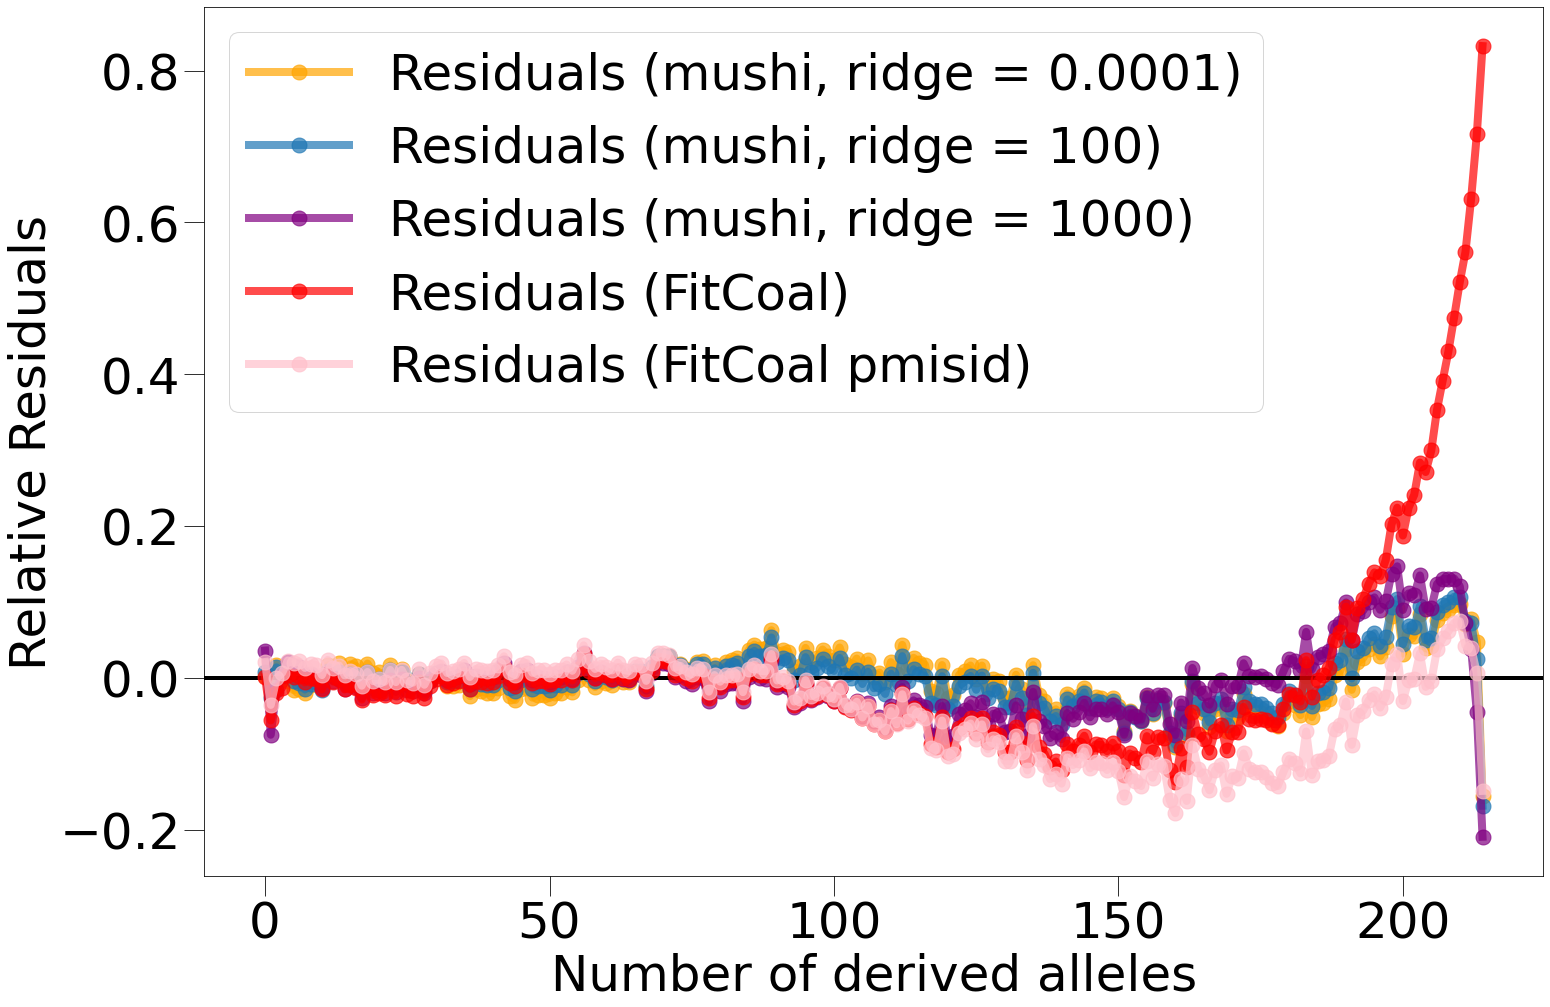

In [78]:
# proposed Sup Fig 5b

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

zlinewidth = 8

folded = 'False'
zmarkersize = 0.1
zalpha=1
# for truncate in [1,10,20,21,26,30,40]:
truncate = 1
relative_resids  = True
for trend_1 in trend_1s:
    for trend_2 in trend_2s: 
        
        # load observed data SFS and plot it (black)
        pop='YRI'
        observed_SFSfile= f'/home/tc557/rds/rds-durbin-group-8b3VcZwY7rY/projects/human/1000Genomes_30X/vcf/GRCh37/SFS_241127/noncoding_{zpop}_allchrs_ndxx.txt.gz'

        observed_sfs = np.loadtxt(observed_SFSfile)
        observed_sfs_one_to_nminusone = observed_sfs[1:-1]
        
        # load FitCoal inferred model
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_polar_noncoding/truncate{ztruncate}_{zpop}.txt'
        
        inference = np.loadtxt(inferencefile,skiprows=1)
        inference[:,0] = gen*inference[:,0]/FitCoal_gen
        FitCoal_timepoints = clean_time_column_from_FitCoal(inference[0:-1,0])
        pmisid_FitCoal = 0.019536885330969797
        expected_SFS_from_FitCoal_calculatedbymushi = compute_expected_sfs(len(observed_sfs)-1, FitCoal_timepoints/gen, inference[:,1]*2) # get the expected SFS from FitCoal's model, using mushi's function
        expected_SFS_from_FitCoal_calculatedbymushi_norm = expected_SFS_from_FitCoal_calculatedbymushi/expected_SFS_from_FitCoal_calculatedbymushi.sum()
        expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid = (1-pmisid_FitCoal)*expected_SFS_from_FitCoal_calculatedbymushi_norm+pmisid_FitCoal*expected_SFS_from_FitCoal_calculatedbymushi_norm[::-1]

        for ridge in ridges:
            print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; truncate={truncate}')

#             plt.plot(observed_sfs_one_to_nminusone,label="Observed",linewidth=4,markersize=10,marker='o',color="black")

            # load mushi's expected SFS under model
            mushi_model_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_hg19_241129/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}model_parameters.pickle'


            with open(mushi_model_file,'rb') as f:
                mushi_model_params = pickle.load(f)
            mushi_p = mushi_model_params['ancestral_state_misidentification_rate']
            ancestral_state_misidentification_rate = mushi_p
            print(f'ancestral_state_misidentification_rate = {ancestral_state_misidentification_rate}')
            _observed_data = mushi_model_params['observed_SFS']
            mushi_expected_SFS = mushi_model_params['expected_sfs']
            mushi_expected_SFS_norm = mushi_expected_SFS/mushi_expected_SFS.sum()


            observed_sfs_one_to_nminusone_norm = observed_sfs_one_to_nminusone/observed_sfs_one_to_nminusone.sum()
            residuals_FitCoal = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm
            residuals_FitCoal_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm)/observed_sfs_one_to_nminusone_norm           
            residuals_FitCoal_pmisid = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid            
            residuals_FitCoal_pmisid_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid)/observed_sfs_one_to_nminusone_norm            
            residuals_mushi = observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm
            residuals_mushi_relative = (observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm)/observed_sfs_one_to_nminusone_norm
            if ridge=='1e-04':
                ridgelab = 0.0001
            else:
                ridgelab = ridge
            if relative_resids == False:
                
                if ridge == '1e-04':                    
                    plt.plot(residuals_FitCoal,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red")
                    plt.plot(residuals_FitCoal_pmisid,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="purple",linestyle="solid")
                plt.plot(residuals_mushi,label=f"Residuals (mushi, ridge = {ridgelab})",linewidth=zlinewidth)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Residual (observed-expected)')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                plt.legend()
            else:
                plt.plot(residuals_mushi_relative,label=f"Residuals (mushi, ridge = {ridgelab})",color=colors_for_Arun[ridge],linewidth=zlinewidth,alpha=0.7,marker='o',markersize=15)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Relative Residuals')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                if ridge == 1000:
                    plt.plot(residuals_FitCoal_relative,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red",alpha=0.7,marker='o',markersize=15)
                    plt.plot(residuals_FitCoal_pmisid_relative,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="pink",linestyle="solid",alpha=0.7,marker='o',markersize=15)

plt.legend(fontsize=50)
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_5b_FitCoal_mushiallridges_SFS_relativeresids.pdf')
plt.show()
            
            


### GRCh37, neutral, nonpolarized


Succeeded for YRI truncate 1
truncate=1
Succeeded for YRI truncate 10
truncate=10
Succeeded for YRI truncate 20
truncate=20
Succeeded for YRI truncate 21
truncate=21
Succeeded for YRI truncate 26
truncate=26


/tmp/ipykernel_1913670/809340126.py:8: UserWarning: loadtxt: Empty input file: "/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/truncate30_YRI.txt"
  inference = np.loadtxt(inferencefile,skiprows=1)
/tmp/ipykernel_1913670/809340126.py:8: UserWarning: loadtxt: Empty input file: "/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/truncate40_YRI.txt"
  inference = np.loadtxt(inferencefile,skiprows=1)


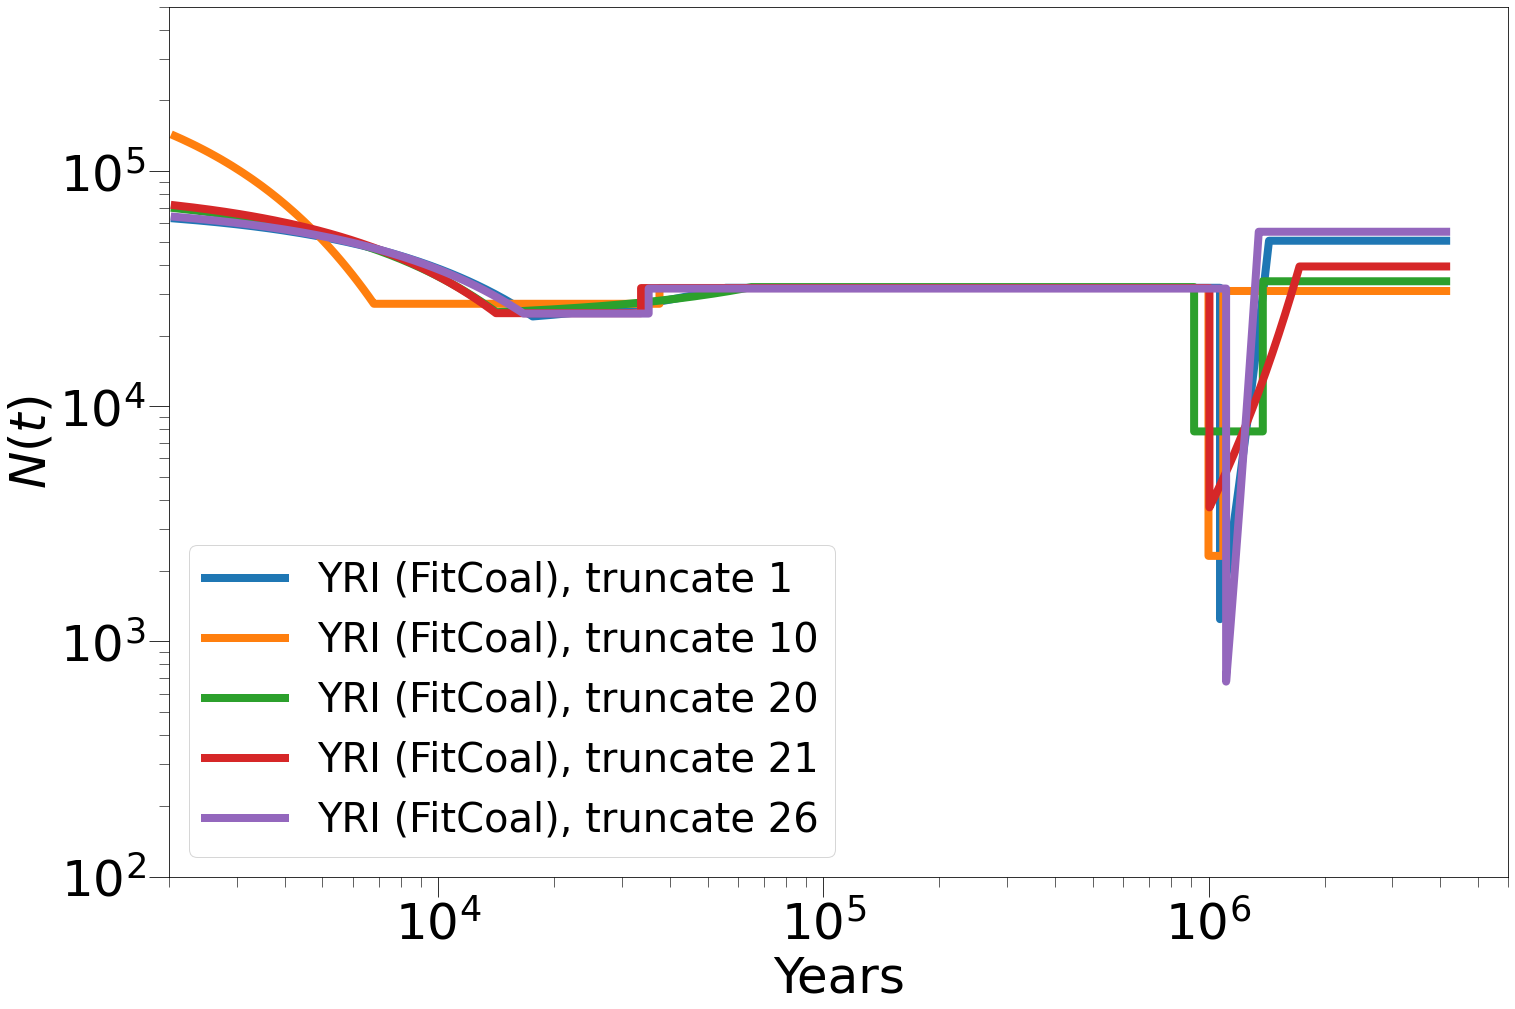

In [37]:
# FitCoal inferences on YRI; hg20, Bvalue

for truncate in [1,10,20,21,26,30,40]:
    # FitCoal
    inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/truncate{truncate}_{zpop}.txt' # hg19 data
    
    try:
        inference = np.loadtxt(inferencefile,skiprows=1)
        plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],label=f'{zpop} (FitCoal), truncate {truncate}',linewidth=zlinewidth)
    except:
        continue
    print(f'Succeeded for {zpop} truncate {truncate}')
    del inference

    print(f'truncate={truncate}')


plt.xlabel('Years')
plt.ylabel('$N(t)$')
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="lower left",ncol=1,fontsize=40)
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
#             plt.title(f'Truncate {truncate}')
plt.ylim(1e+2,5e+05)
plt.xlim(2e+03,6e+06)
#         plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241008/paperFigure_FitCoaltruncate{truncate}_mushi{trend_1}_{trend_2}_{ridge}_YRI_241014_1900.pdf')
plt.show()

In [53]:
# python /home/tc557/falsifying_bottleneck/calculate_LL_differences_various_FitCoal_mushi_models_hg19_Bval_nopolar_241205.py

LLdiffs_file = '/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/LL_differences_various_FitCoal_various_mushi_models_hg19_Bval_nopolar_241218.pickle'
with open(LLdiffs_file,'rb') as f:
    mushi_LL_minus_FitCoal_LL = pickle.load(f)
    

trend_1=0 ; trend_2=1; ridge=1e-04; mag=5e+04
	ancestral_state_misidentification_rate = 0.0014574821550250644
	truncate=1
		LL mushi -1990.61, LL FitCoal_p -2791.6 LL FitCoal_p' -3261.26
			(p) 800.99
			(p') 1270.65
	truncate=10
		LL mushi -1990.61, LL FitCoal_p -1964.61 LL FitCoal_p' -3095.07
			(p) -25.99
			(p') 1104.46
	truncate=20
		LL mushi -1990.61, LL FitCoal_p -2298.33 LL FitCoal_p' -3559.53
			(p) 307.72
			(p') 1568.92
	truncate=21
		LL mushi -1990.61, LL FitCoal_p -2217.69 LL FitCoal_p' -3197.77
			(p) 227.08
			(p') 1207.16
	truncate=26
		LL mushi -1990.61, LL FitCoal_p -2671.56 LL FitCoal_p' -3199.78
			(p) 680.95
			(p') 1209.17
	truncate=30
	truncate=40
trend_1=0 ; trend_2=1; ridge=100; mag=5e+04
	ancestral_state_misidentification_rate = 0.0017339939690842318
	truncate=1
		LL mushi -2347.65, LL FitCoal_p -2883.25 LL FitCoal_p' -3261.26
			(p) 535.6
			(p') 913.61
	truncate=10
		LL mushi -2347.65, LL FitCoal_p -1951.41 LL FitCoal_p' -3095.07
			(p) -396.24
			(p') 747.4

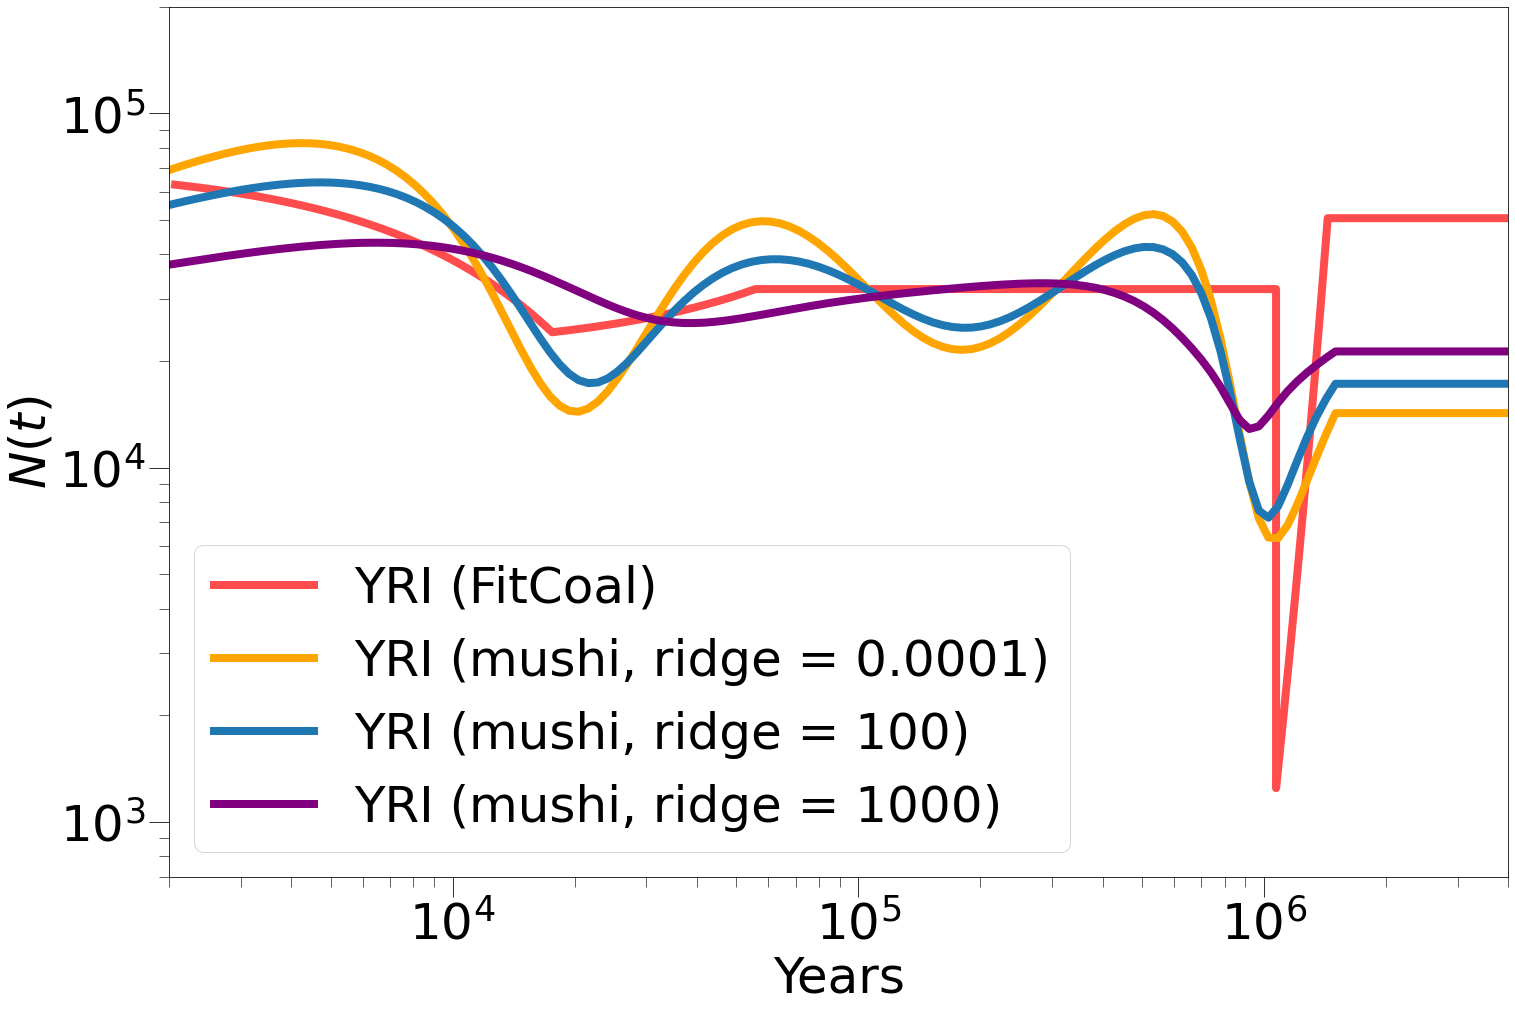

In [56]:
# proposed Sup Fig 3a
# noncoding data with polarisation
# plot all mushi inference
FitCoal_colors_pops = {'MSL':'red','ESN':'red','YRI':'red','CHB':'lightskyblue','JPT':'lightskyblue','BEB':'green','GBR':'gold','TSI':'gold','ITU':'gold'}

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

zlinewidth=8
# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

folded = 'False'
zpop = 'YRI'
most_ancient_genss = ['5e+04']
truncate = 1
ztruncate = 1
for trend_1 in trend_1s:
    for trend_2 in trend_2s:
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/truncate{ztruncate}_{zpop}.txt' # hg19 data
        inference = np.loadtxt(inferencefile,skiprows=1)
        if len(inference)!=0:
            plt.plot(gen*inference[:,0]/FitCoal_gen,inference[:,1],color=FitCoal_colors_pops[zpop],label=f'{zpop} (FitCoal)',linewidth=zlinewidth,alpha=0.7)
        else:
            continue    
        for ridge in ridges:
            ztruncate = 1
            # FitCoal
            

            for most_ancient_gens in most_ancient_genss:
                print(f'trend_1={trend_1} ; trend_2={trend_2}; ridge={ridge}; mag={most_ancient_gens}')
                # mushi 
                inferenceparameters_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_hg19_241129b/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}model_parameters.pickle'
                
                try:
                    with open(inferenceparameters_file,'rb') as f:
                        inferenceparameters = pickle.load(f)
                except:
                    print(f'FAILED')
                    continue
                mushi_model = inferenceparameters['mushi_model']
                mushi_model = np.concatenate([mushi_model,np.array([[9e+06,mushi_model[-1,1]]])])   # append final entry   
                
                zancestral_state_misidentification_rate = inferenceparameters["ancestral_state_misidentification_rate"]
                print(f'\tancestral_state_misidentification_rate = {zancestral_state_misidentification_rate}')
                
                if ridge =='1e-04':
                    ridgelab = 0.0001
                else:
                    ridgelab = ridge
                plt.plot(gen*mushi_model[:,0]/mushi_gen,mushi_model[:,1],label=f'{zpop} (mushi, ridge = {ridgelab})',color=colors_for_Arun[ridge],linewidth=zlinewidth)
                
##
                for truncate in [1,10,20,21,26,30,40]:
                    print(f'\ttruncate={truncate}')
                    try:
                        stringkey_ = f'truncate={truncate}; trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; most_ancient_gens={most_ancient_gens}; pts={pts}'
                        # print(f'\t\tLL diffs = {mushi_LL_minus_FitCoal_LL[stringkey_]}')
#                         print(f'\tridge {ridge}\n\t\tLL_mushi - LL_FitCoal')
                        print(f'\t\tLL mushi {round(mushi_LL_minus_FitCoal_LL[stringkey_][5],2)}, LL FitCoal_p {round(mushi_LL_minus_FitCoal_LL[stringkey_][3],2)} LL FitCoal_p\' {round(mushi_LL_minus_FitCoal_LL[stringkey_][4],2)}')
                        print(f'\t\t\t(p) {round(mushi_LL_minus_FitCoal_LL[stringkey_][1],2)}')
                        print(f'\t\t\t(p\') {round(mushi_LL_minus_FitCoal_LL[stringkey_][0],2)}')
                    except:
                        continue
                    
            plt.xlabel('Years')
            plt.ylabel('$N(t)$')
            plt.xscale('log')
            plt.yscale('log')

            plt.legend(loc="lower left")
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            #             plt.title(f'Truncate {truncate}')
            plt.ylim(7e+2,2e+05)
            plt.xlim(2e+03,4e+06)
        plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_4a_FitCoal_mushiallridges_Ne.pdf')
        
        plt.show()


trend_1=0; trend_2=1; ridge=1e-04; truncate=1
	ancestral_state_misidentification_rate=0.0014574821550250644
trend_1=0; trend_2=1; ridge=100; truncate=1
	ancestral_state_misidentification_rate=0.0017339939690842318
trend_1=0; trend_2=1; ridge=1000; truncate=1
	ancestral_state_misidentification_rate=0.0026439750056778343


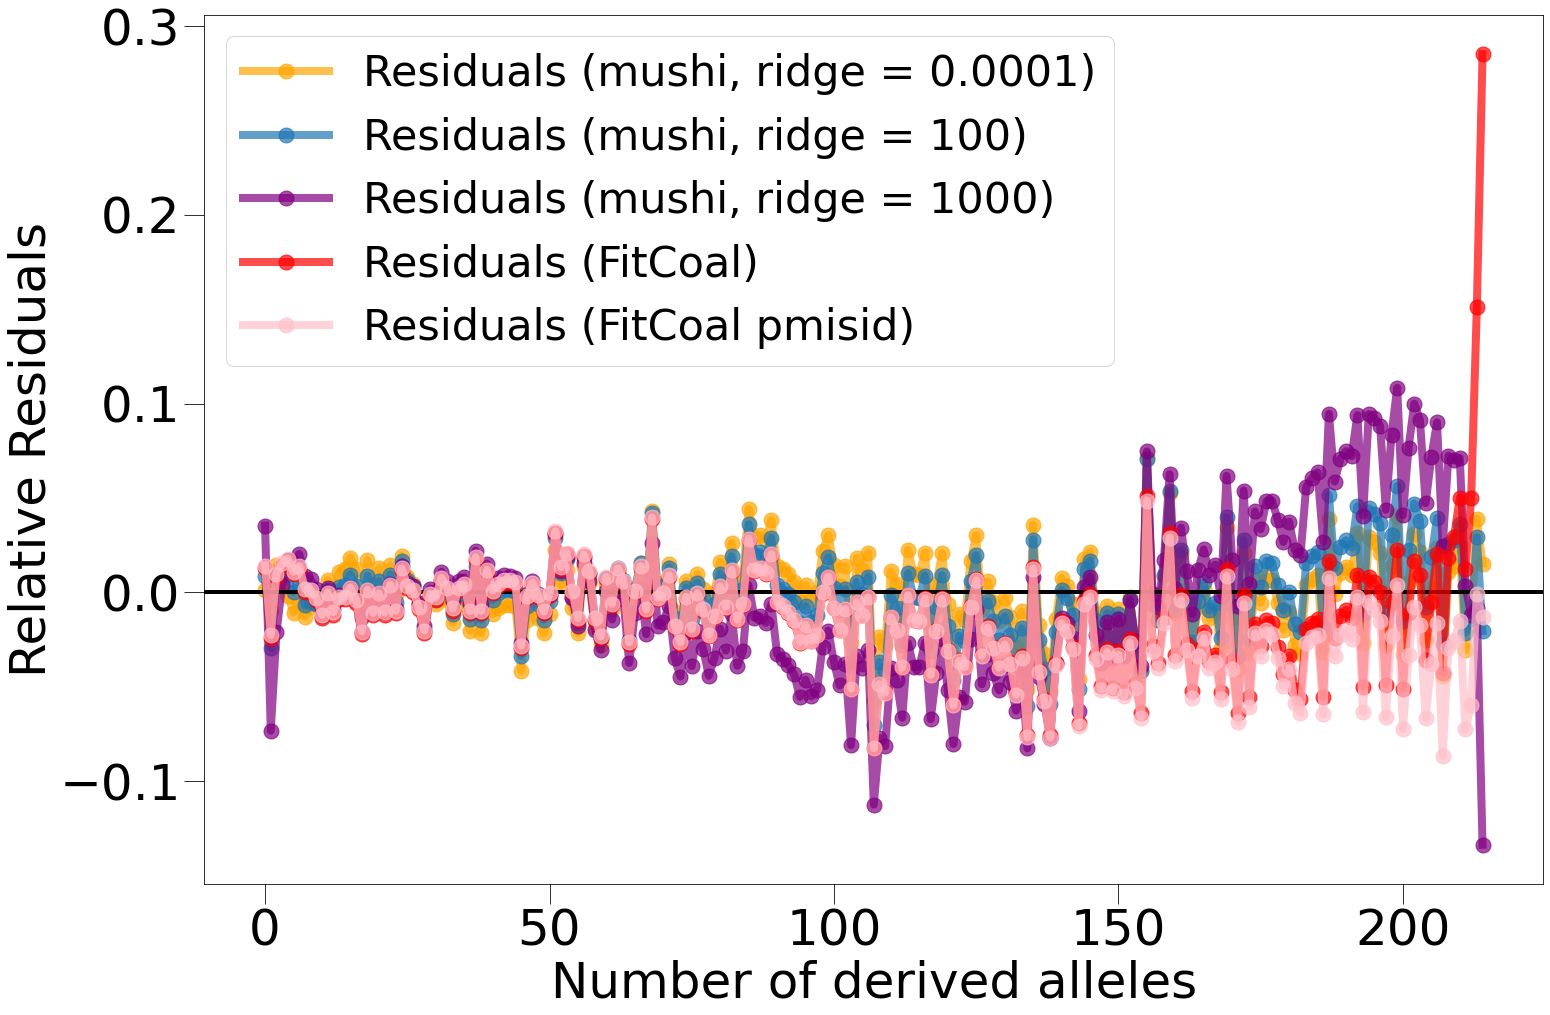

In [80]:
# proposed Sup Fig 2c

FitCoal_gen = 29 # the gen I used in FitCoal
mushi_gen = 30 # the gen I used in mushi
gen = 30 # the gen I use here

# trend_1s = [2,0]
# trend_2s = [1,10,100,1000]
# ridges = [100,750,1000,5000]
trend_1s = [0]
trend_2s = [1]
ridges = ['1e-04',100,1000]

zlinewidth = 8

folded = 'False'
zmarkersize = 0.1
zalpha=1
# for truncate in [1,10,20,21,26,30,40]:
truncate = 1
relative_resids  = True
for trend_1 in trend_1s:
    for trend_2 in trend_2s: 
        
        # load observed data SFS and plot it (black)
        pop='YRI'
        observed_SFSfile= f'/home/tc557/rds/rds-durbin-group-8b3VcZwY7rY/projects/human/1000Genomes_30X/vcf/GRCh37/SFS_241128/{zpop}_allchrs_ndxx.txt.gz'

        observed_sfs = np.loadtxt(observed_SFSfile)
        observed_sfs_one_to_nminusone = observed_sfs[1:-1]
        
        # load FitCoal inferred model
        inferencefile = f'/home/tc557/FitCoal1dot0/inference1KGP_241129_mydatahg19_nopolar_Bval/truncate{truncate}_{zpop}.txt'
        inference = np.loadtxt(inferencefile,skiprows=1)
        inference[:,0] = gen*inference[:,0]/FitCoal_gen
        FitCoal_timepoints = clean_time_column_from_FitCoal(inference[0:-1,0])
        pmisid_FitCoal = 0.0014574821550250644
        expected_SFS_from_FitCoal_calculatedbymushi = compute_expected_sfs(len(observed_sfs)-1, FitCoal_timepoints/gen, inference[:,1]*2) # get the expected SFS from FitCoal's model, using mushi's function
        expected_SFS_from_FitCoal_calculatedbymushi_norm = expected_SFS_from_FitCoal_calculatedbymushi/expected_SFS_from_FitCoal_calculatedbymushi.sum()
        expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid = (1-pmisid_FitCoal)*expected_SFS_from_FitCoal_calculatedbymushi_norm+pmisid_FitCoal*expected_SFS_from_FitCoal_calculatedbymushi_norm[::-1]

        for ridge in ridges:
            print(f'trend_1={trend_1}; trend_2={trend_2}; ridge={ridge}; truncate={truncate}')

#             plt.plot(observed_sfs_one_to_nminusone,label="Observed",linewidth=4,markersize=10,marker='o',color="black")

            # load mushi's expected SFS under model
            mushi_model_file = f'/home/tc557/rds/hpc-work/mushi_1KGP_inference_hg19_241129b/{zpop}_{trend_1}_{trend_2}_{ridge}_{folded}_{most_ancient_gens}model_parameters.pickle'

            with open(mushi_model_file,'rb') as f:
                mushi_model_params = pickle.load(f)
            mushi_p = mushi_model_params['ancestral_state_misidentification_rate']
            ancestral_state_misidentification_rate = mushi_p
            print(f'\tancestral_state_misidentification_rate={ancestral_state_misidentification_rate}')
            _observed_data = mushi_model_params['observed_SFS']
            mushi_expected_SFS = mushi_model_params['expected_sfs']
            mushi_expected_SFS_norm = mushi_expected_SFS/mushi_expected_SFS.sum()


            observed_sfs_one_to_nminusone_norm = observed_sfs_one_to_nminusone/observed_sfs_one_to_nminusone.sum()
            residuals_FitCoal = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm
            residuals_FitCoal_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm)/observed_sfs_one_to_nminusone_norm           
            residuals_FitCoal_pmisid = observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid            
            residuals_FitCoal_pmisid_relative = (observed_sfs_one_to_nminusone_norm - expected_SFS_from_FitCoal_calculatedbymushi_norm_ancmisid)/observed_sfs_one_to_nminusone_norm            
            residuals_mushi = observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm
            residuals_mushi_relative = (observed_sfs_one_to_nminusone_norm - mushi_expected_SFS_norm)/observed_sfs_one_to_nminusone_norm
            if ridge=='1e-04':
                ridgelab = 0.0001
            else:
                ridgelab = ridge
            if relative_resids == False:
                
                if ridge == '1e-04':                    
                    plt.plot(residuals_FitCoal,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red")
                    plt.plot(residuals_FitCoal_pmisid,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="purple",linestyle="solid")
                plt.plot(residuals_mushi,label=f"Residuals (mushi, ridge = {ridgelab})",linewidth=zlinewidth)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Residual (observed-expected)')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                plt.legend()
            else:
                plt.plot(residuals_mushi_relative,label=f"Residuals (mushi, ridge = {ridgelab})",color=colors_for_Arun[ridge],linewidth=zlinewidth,alpha=0.7,marker='o',markersize=15)
                plt.axhline(0,color="black",linewidth=4)
                plt.xlabel('Number of derived alleles')
                plt.ylabel('Relative Residuals')
                plt.tick_params(which='major',length=20)
                plt.tick_params(which='minor',length=10)
                if ridge == 1000:
                    plt.plot(residuals_FitCoal_relative,label="Residuals (FitCoal)",linewidth=zlinewidth,color="red",alpha=0.7,marker='o',markersize=15)
                    plt.plot(residuals_FitCoal_pmisid_relative,label="Residuals (FitCoal pmisid)",linewidth=zlinewidth,color="pink",linestyle="solid",alpha=0.7,marker='o',markersize=15)

plt.legend(fontsize=43)
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_4b_FitCoal_mushiallridges_SFS_relativeresids.pdf')
plt.show()
            
            


# Comparing observed SFS

Compare the SFS as processed in various ways. 

In [49]:
# load mushi's expected SFS under model
zpop = 'YRI'
trend_1 = 0 
trend_2 = 1
ridge = '1e-04'
folded = False


GRCH38_SFS_all_file = 'YRI_GRCh38_neutral_nonpolarized.txt'
GRCH38_SFS_all = np.loadtxt(GRCH38_SFS_all_file)
GRCH38_SFS_1tonminus1_norm = GRCH38_SFS_all[1:-1]/GRCH38_SFS_all[1:-1].sum()

GRCh37me_SFS_all_file = 'YRI_GRCh38_neutral_nonpolarized.txt'
GRCh37me_SFS_all = np.loadtxt(GRCh37me_SFS_all_file)
GRCh37me_SFS_1tonminus1_norm = GRCh37me_SFS_all[1:-1]/GRCh37me_SFS_all[1:-1].sum()


GRCh37Hu_SFS_all_file = 'YRI_GRCh37_noncoding_polarized.txt'
GRCh37Hu_SFS_all = np.loadtxt(GRCh37Hu_SFS_all_file)
GRCh37Hu_SFS_1tonminus1_norm = GRCh37Hu_SFS_all[1:-1]/GRCh37Hu_SFS_all[1:-1].sum()



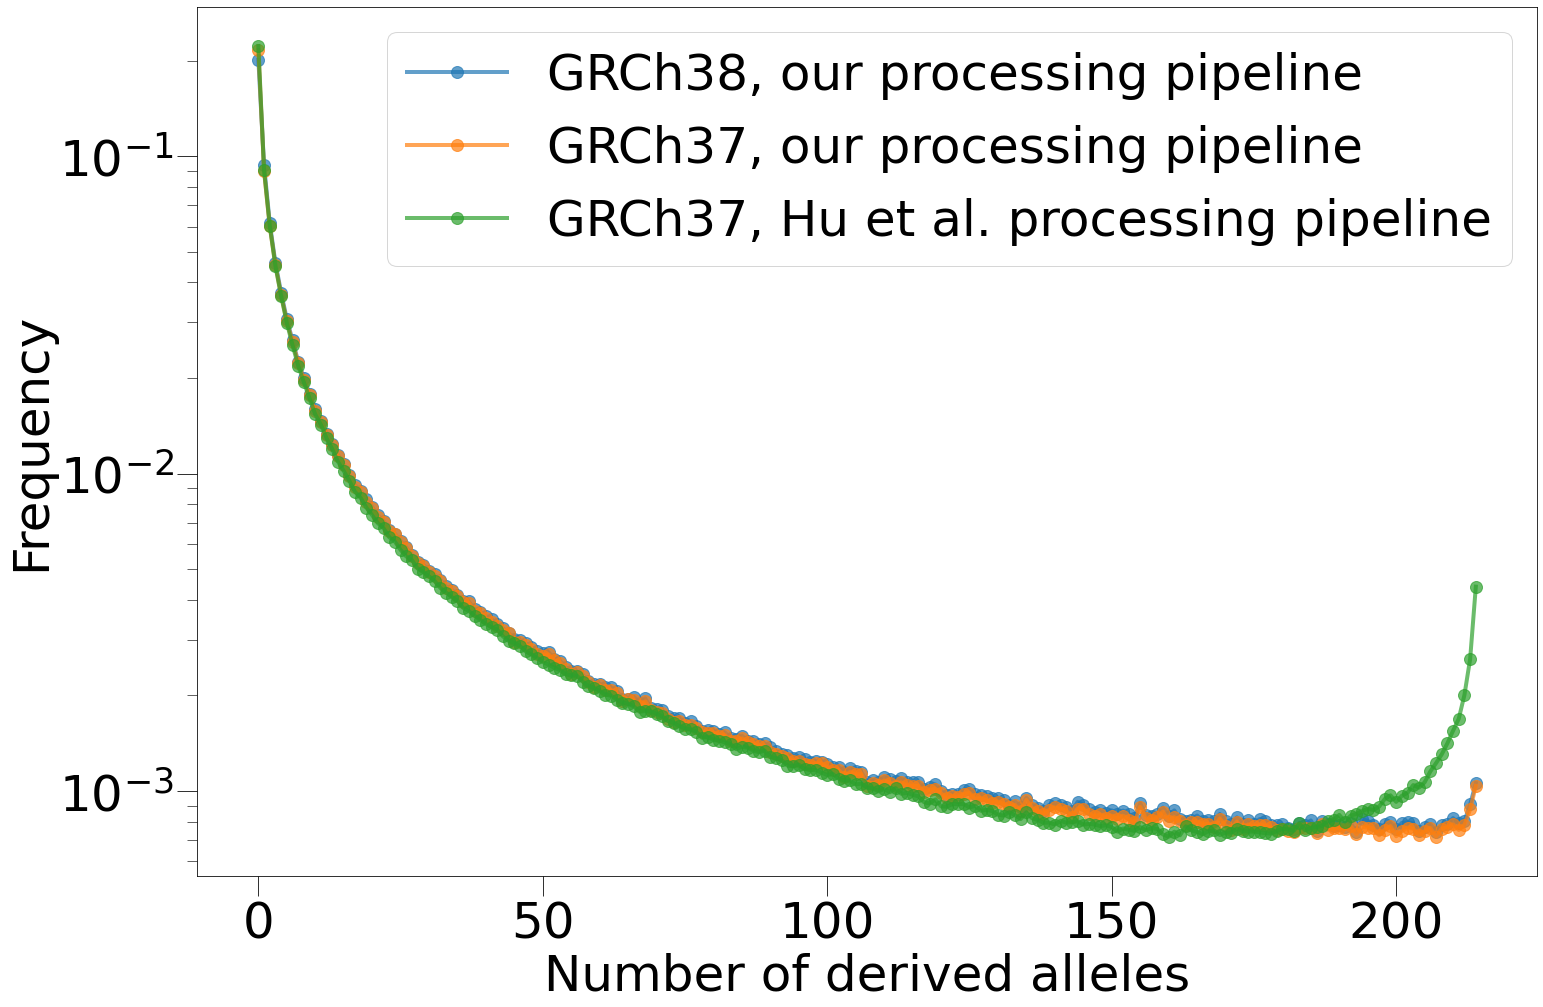

In [70]:
# proposed Sup Fig 3
zlw = 4
zms = 12
za = 0.7
plt.plot(GRCH38_SFS_1tonminus1_norm,linewidth=zlw,markersize=zms,marker='o',label="GRCh38, our processing pipeline",alpha=za)
plt.plot(GRCh37me_SFS_1tonminus1_norm,linewidth=zlw,markersize=zms,marker='o',label="GRCh37, our processing pipeline",alpha=za)
plt.plot(GRCh37Hu_SFS_1tonminus1_norm,linewidth=zlw,markersize=zms,marker='o',label="GRCh37, Hu et al. processing pipeline",alpha=za)
plt.xlabel('Number of derived alleles')
plt.ylabel('Frequency')
plt.yscale('log')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend()
plt.savefig(f'/home/tc557/falsifying_bottleneck/Figures_241219/paperSupFig_3_YRI_SFS_differentprocessing.pdf')
